In [ ]:
!nvidia-smi

Thu Mar 28 01:23:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 39 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.8 MB/s eta 0:00:00


In [ ]:
import h2o

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp86d7_ol5
  JVM stdout: /tmp/tmp86d7_ol5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp86d7_ol5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    14 days, 10 hours and 2 minutes
H2O_cluster_name:           H2O_from_python_unknownUser_x3jsok
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np

In [ ]:
diabetic_data=pd.read_csv("/content/drive/MyDrive/ML data set/diabetes.csv")

In [ ]:
diabetic_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
diabetic_data.replace(0,np.nan,inplace=True)
diabetic_data["Outcome"]=diabetic_data["Outcome"].fillna(0)

In [ ]:
diabetic_data.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
diabetic_data=h2o.H2OFrame(diabetic_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
diabetic_data.types

{'Pregnancies': 'int',
 'Glucose': 'int',
 'BloodPressure': 'int',
 'SkinThickness': 'int',
 'Insulin': 'int',
 'BMI': 'real',
 'DiabetesPedigreeFunction': 'real',
 'Age': 'int',
 'Outcome': 'int'}

In [ ]:
diabetic_data.describe()

Rows:768
Cols:9

Pregnancies         Glucose             BloodPressure       SkinThickness       Insulin             BMI                 DiabetesPedigreeFunction    Age                 Outcome
-------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  --------------------------  ------------------  -------------------
type     int                 int                 int                 int                 int                 real                real                        int                 int
mins     1.0                 44.0                24.0                7.0                 14.0                18.2                0.078                       21.0                0.0
mean     4.494672754946726   121.68676277850595  72.40518417462486   29.15341959334567   155.54822335025375  32.457463672391015  0.4718763020833334          33.240885416666615  0.3489583333333333
maxs     17.0                199.0               122.0               99.0                846.0               67.1                2.42                        81.0                1.0
sigma    3.2172911635189627  30.53564107280403   12.382158210105267  10.476982369987208  118.77585518724517  6.92498833210591    0.331328595012775           11.760231540678689  0.47695137724279896
zeros    0                   0                   0                   0                   0                   0                   0                           0                   500
missing  111                 5                   35                  227                 374                 11                  0                           0                   0
0        6.0                 148.0               72.0                35.0                nan                 33.6                0.627                       50.0                1.0
1        1.0                 85.0                66.0                29.0                nan                 26.6                0.351                       31.0                0.0
2        8.0                 183.0               64.0                nan                 nan                 23.3                0.672                       32.0                1.0
3        1.0                 89.0                66.0                23.0                94.0                28.1                0.167                       21.0                0.0
4        nan                 137.0               40.0                35.0                168.0               43.1                2.288                       33.0                1.0
5        5.0                 116.0               74.0                nan                 nan                 25.6                0.201                       30.0                0.0
6        3.0                 78.0                50.0                32.0                88.0                31.0                0.248                       26.0                1.0
7        10.0                115.0               nan                 nan                 nan                 35.3                0.134                       29.0                0.0
8        2.0                 197.0               70.0                45.0                543.0               30.5                0.158                       53.0                1.0
9        8.0                 125.0               96.0                nan                 nan                 nan                 0.232                       54.0                1.0
[768 rows x 9 columns]

In [ ]:
train_data,test_data=diabetic_data.split_frame(ratios=[0.8])

In [ ]:
train_data,test_data

(  Pregnancies    Glucose    BloodPressure    SkinThickness    Insulin    BMI    DiabetesPedigreeFunction    Age    Outcome
-------------  ---------  ---------------  ---------------  ---------  -----  --------------------------  -----  ---------
            6        148               72               35        nan   33.6                       0.627     50          1
            1         85               66               29        nan   26.6                       0.351     31          0
          nan        137               40               35        168   43.1                       2.288     33          1
            3         78               50               32         88   31                         0.248     26          1
           10        115              nan              nan        nan   35.3                       0.134     29          0
           10        168               74              nan        nan   38                         0.537     34          1
           10  

In [ ]:
x=diabetic_data.columns
y="Outcome"
x.remove(y)
x

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
auto_ml=H2OAutoML(max_models=15, seed=10, verbosity="info")

In [ ]:
auto_ml.train(x=x, y=y, training_frame=train_data)

AutoML progress: |
01:24:41.694: Project: AutoML_1_20240328_12441
01:24:41.698: 5-fold cross-validation will be used.
01:24:41.702: Setting stopping tolerance adaptively based on the training frame: 0.04052204492365539
01:24:41.703: Build control seed: 10
01:24:41.704: training frame: Frame key: AutoML_1_20240328_12441_training_py_2_sid_8691    cols: 9    rows: 609  chunks: 1    size: 7422  checksum: 7596919177989598478
01:24:41.704: validation frame: NULL
01:24:41.704: leaderboard frame: NULL
01:24:41.704: blending frame: NULL
01:24:41.705: response column: Outcome
01:24:41.706: fold column: null
01:24:41.707: weights column: null
01:24:41.750: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearn

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20240328_12441


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# GLM base models (used / total)           1/1
# DRF base models (used / total)           1/2
# DeepLearning base models (used / total)  1/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.08695081108925481
RMSE: 0.2948742292728458
MAE: 0.23727536838340307
RMSLE: 0.20769371685694035
Mean Residual Deviance: 0.08695081108925481
R^2: 0.6142535434498336
Null degrees of freedom: 608
Residual degrees of freedom: 603
Null deviance: 137.27422003284144
Residual deviance: 52.953043953356186
AIC: 254.8377930537144

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.15815200740044869
RMSE: 0.3976833003791443
MAE: 0.3227892769834943
RMSLE: 0.2793012935180134
Mean Residual Deviance: 0.15815200740044869
R^2: 0.2983782935803134
Null degrees of freedom: 608
Residual degrees of freedom: 603
Null deviance: 137.6444622049454
Residual deviance: 96.31457250687325
AIC: 619.150163939493

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     134.653   18.8705    126.632       159.064       131.999       145.988       109.581
loglikelihood           0         0          0             0             0             0             0
mae                     0.325253  0.0249059  0.303316      0.353224      0.343441      0.330368      0.295916
mean_residual_deviance  0.157085  0.018393   0.147391      0.177193      0.1578        0.171428      0.131616
mse                     0.157085  0.018393   0.147391      0.177193      0.1578        0.171428      0.131616
null_deviance           27.5289   2.59865    26.93         31.9734       25.1489       26.5118       27.0803
r2                      0.298244  0.0825766  0.331169      0.259785      0.259219      0.215174      0.425872
residual_deviance       19.186    2.91416    17.9817       23.2122       18.4625       20.7428       15.5307
rmse                    0.395785  0.0234406  0.383915      0.420943      0.39724       0.414038      0.362789
rmsle                   0.27809   0.0164215  0.266582      0.291367      0.290853      0.28666       0.25499

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse        mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
DRF_1_AutoML_1_20240328_12441                           0.23182   0.0537405  0.165106  0.163016                 0.0537405                 308                   0.037241  DRF
XRT_1_AutoML_1_20240328_12441                           0.237866  0.0565803  0.172131  0.168031                 0.0565803                 439                   0.03481   DRF
XGBoost_2_AutoML_1_20240328_12441                       0.240604  0.0578904  0.148519  0.170739                 0.0578904                 601                   0.007644  XGBoost
XGBoost_3_AutoML_1_20240328_12441                       0.25524   0.0651475  0.174985  0.180122                 0.0651475                 384                   0.00513   XGBoost
XGBoost_grid_1_AutoML_1_20240328_12441_model_2          0.260668  0.0679477  0.186255  0.185035                 0.0679477                 142                   0.003554  XGBoost
GBM_5_AutoML_1_20240328_12441                           0.272439  0.0742232  0.206209  0.1912                   0.0742232                 189                   0.015814  GBM
XGBoost_1_AutoML_1_20240328_12441                       0.272505  0.0742589  0.194503  0.194392                 0.0742589                 252                   0.003932  XGBoost
GBM_4_AutoML_1_20240328_12441                           0.299929  0.0899573  0.234577  0.210343                 0.0899573                 213                   0.019265  GBM
GBM_3_AutoML_1_20240328_12441                           0.301551  0.090933   0.238786  0.211376                 0.090933                  159                   0.018143  GBM
GBM_2_AutoML_1_20240328_12441                           0.302413  0.0914535  0.236056  0.212307                 0.0914535                 218                   0.021223  GBM
XGBoost_grid_1_AutoML_1_20240328_12441_model_1          0.312965  0.0979468  0.235515  0.222856                 0.0979468                 244                   0.003285  XGBoost
StackedEnsemble_AllModels_1_AutoML_1_20240328_12441     0.313454  0.0982533  0.250159  0.219857                 0.0982533                 881                   0.10072   StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240328_12441  0.315269  0.0993949  0.252655  0.221217                 0.0993949                 700                   0.057832  StackedEnsemble
GBM_grid_1_AutoML_1_20240328_12441_model_1              0.371501  0.138013   0.311172  0.260851                 0.138013                   60                   0.016633  GBM
GBM_1_AutoML_1_20240328_12441                           0.382638  0.146412   0.316066  0.267931                 0.146412                  235                   0.028979  GBM
DeepLearning_1_AutoML_1_20240328_12441                  0.384944  0.148182   0.305247  0.269578                 0.148182                  170                   0.013951  DeepLearning
GLM_1_AutoML_1_20240328_12441                           0.393448  0.154802   0.327749  0.276757                 0.154802                   30                   0.002111  GLM
[17 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

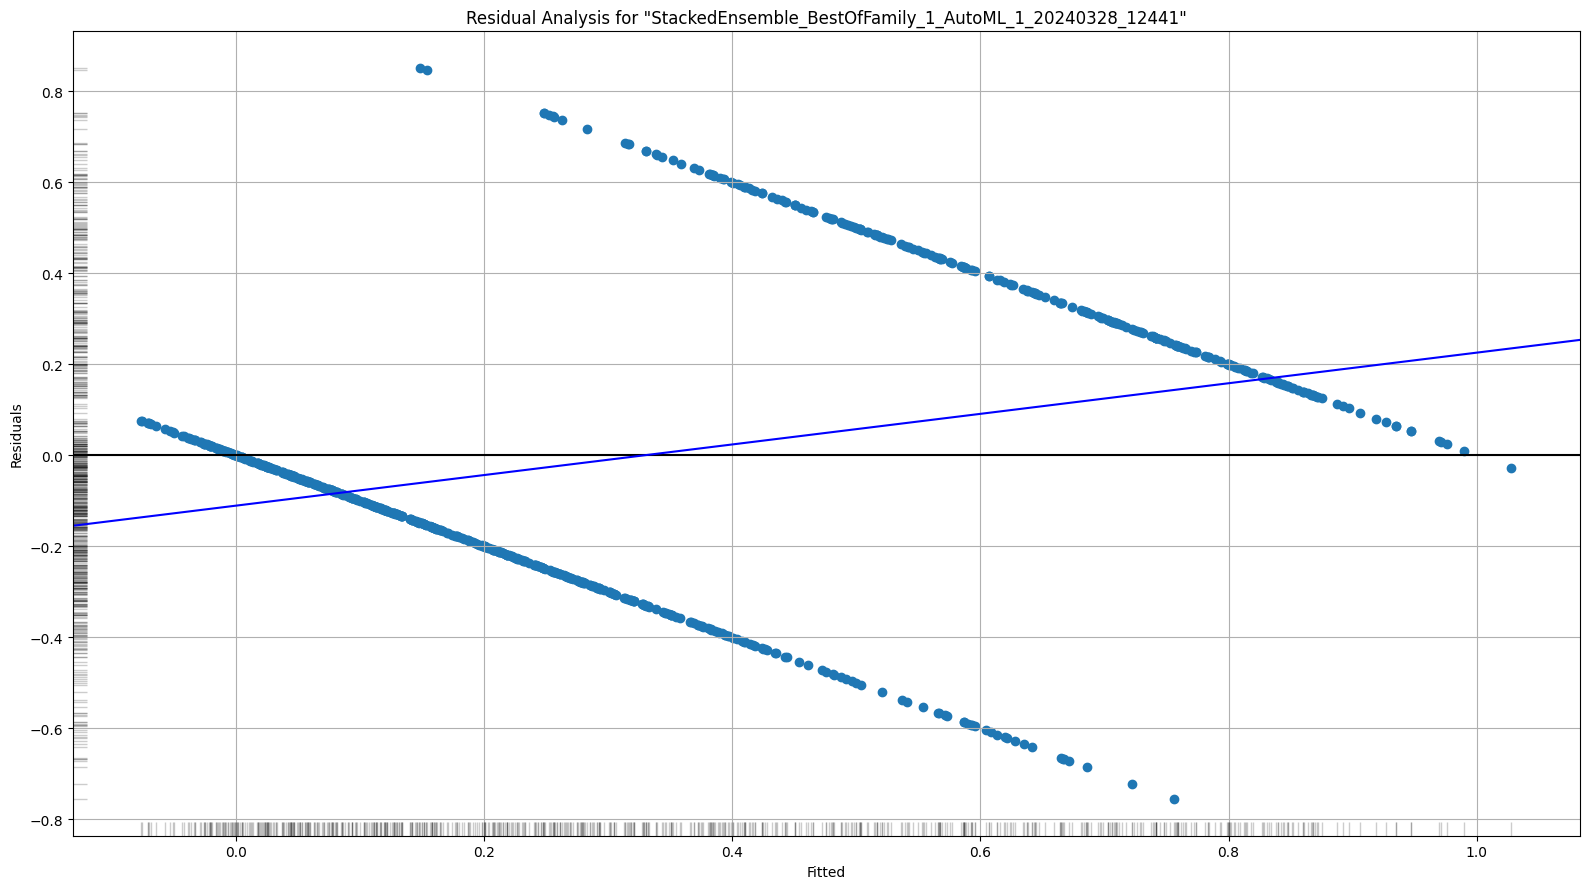

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

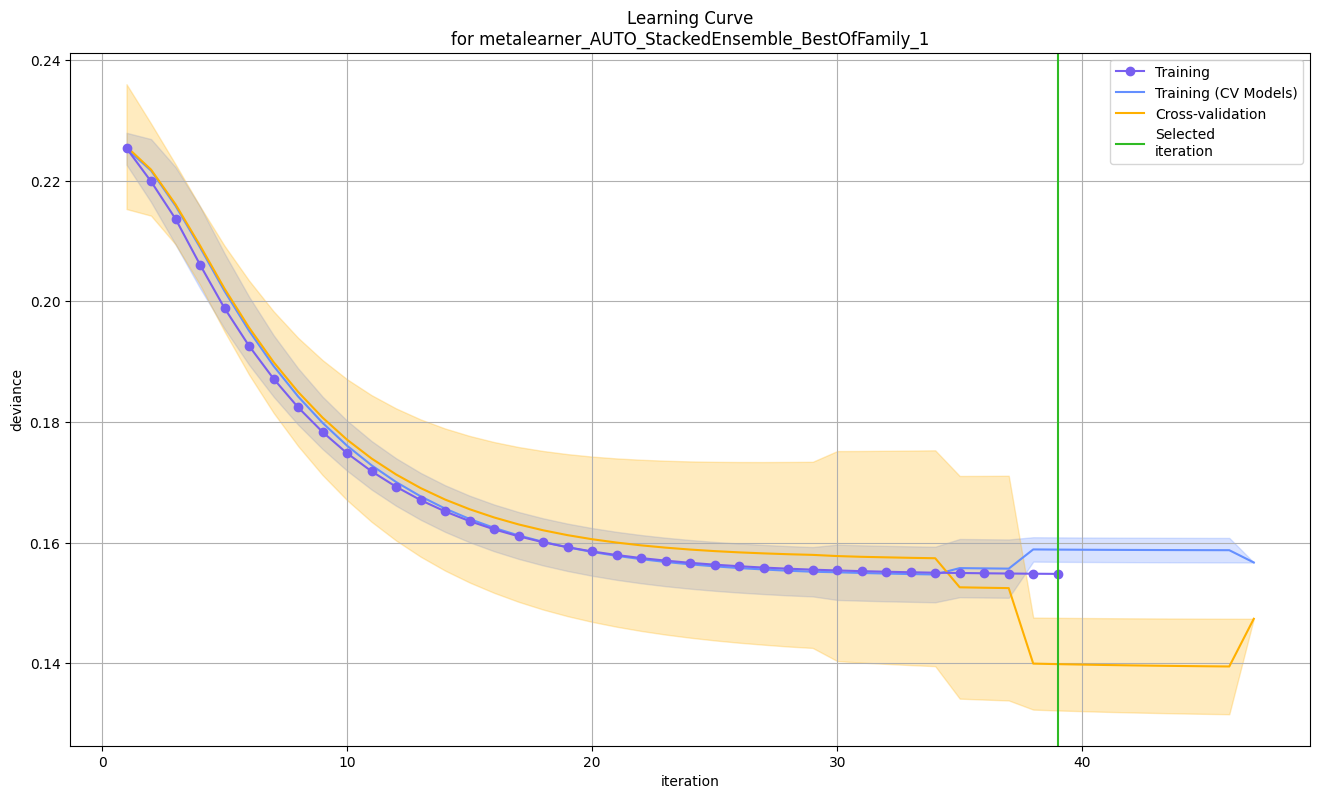

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

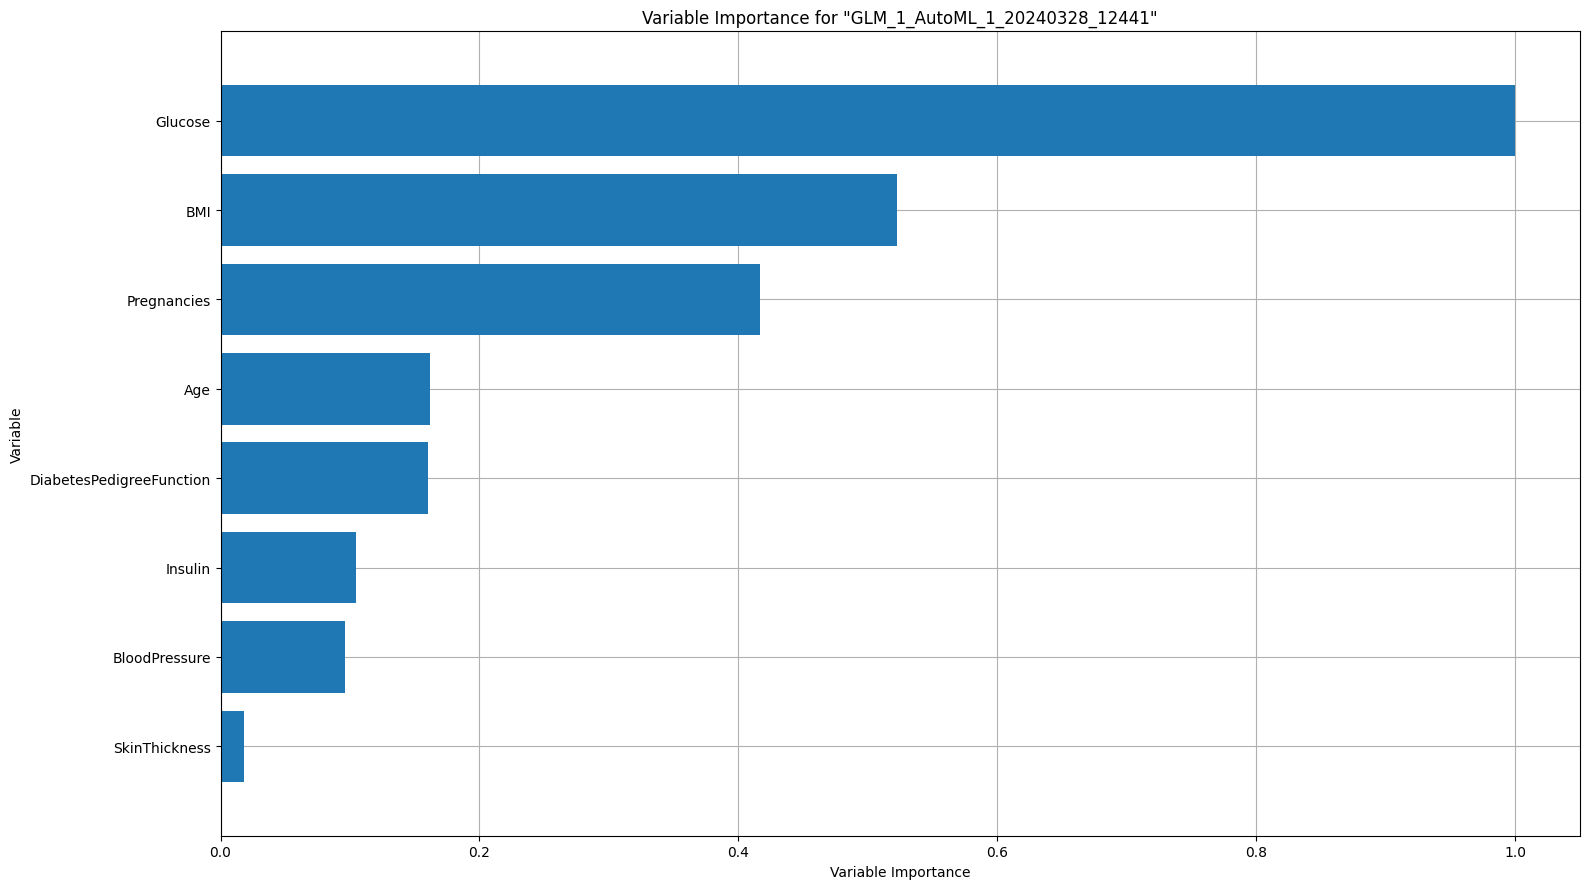

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

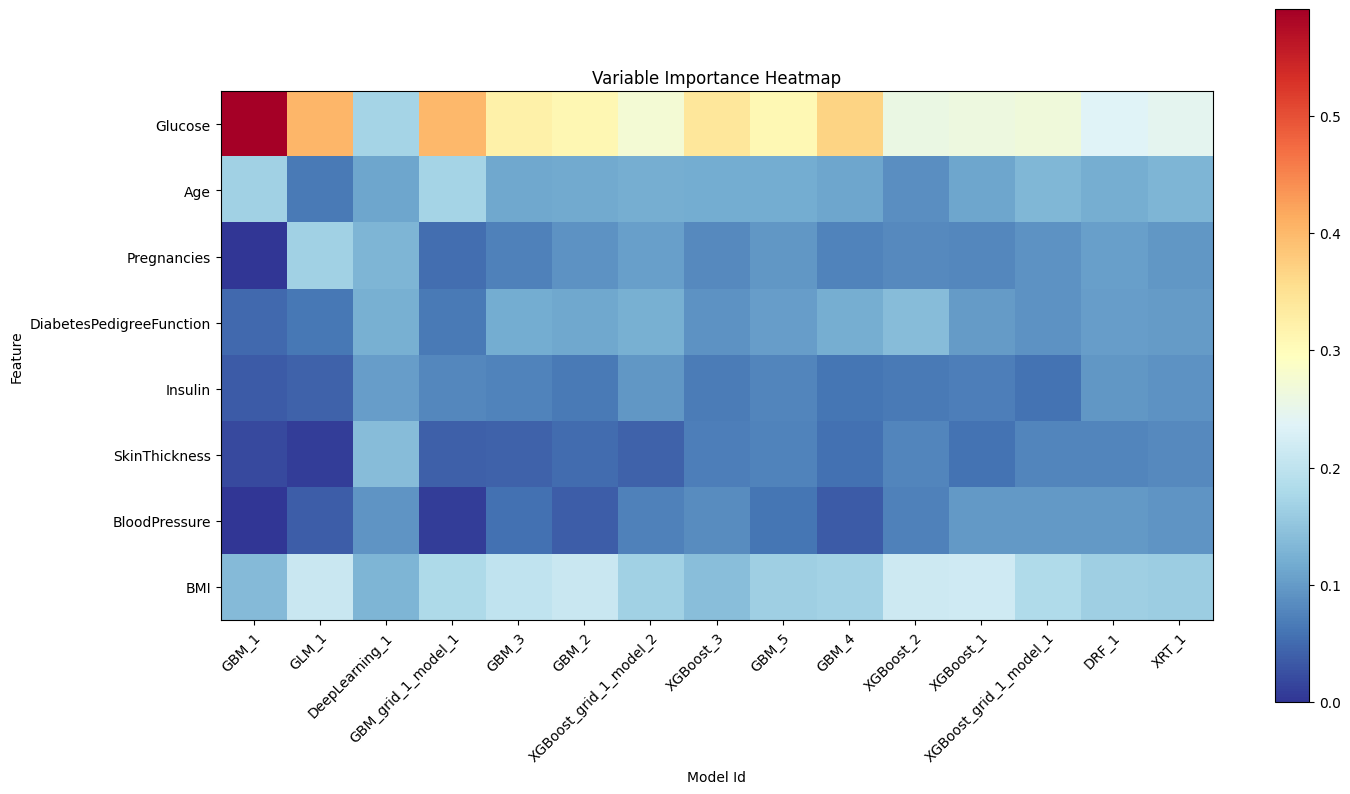

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

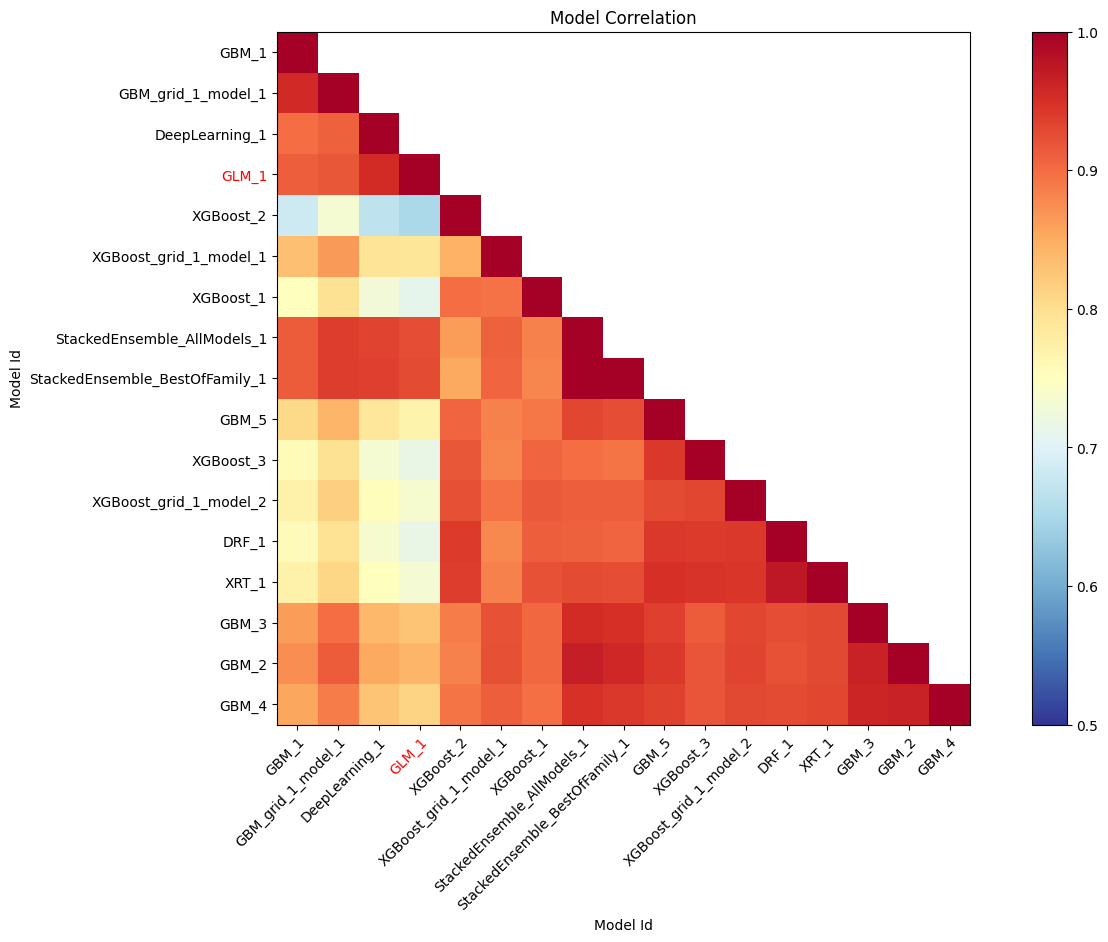

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

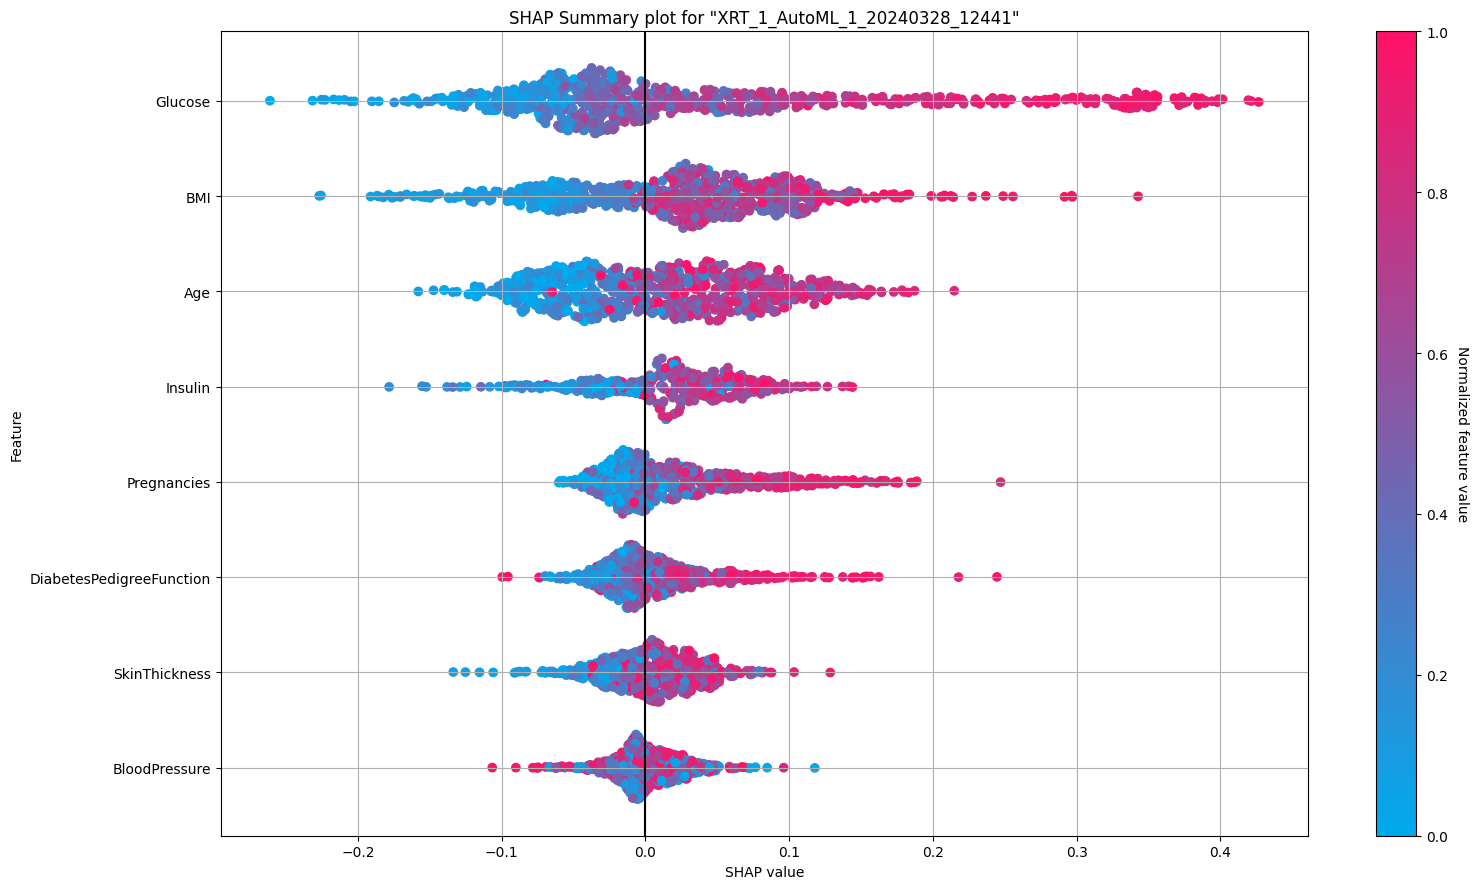

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

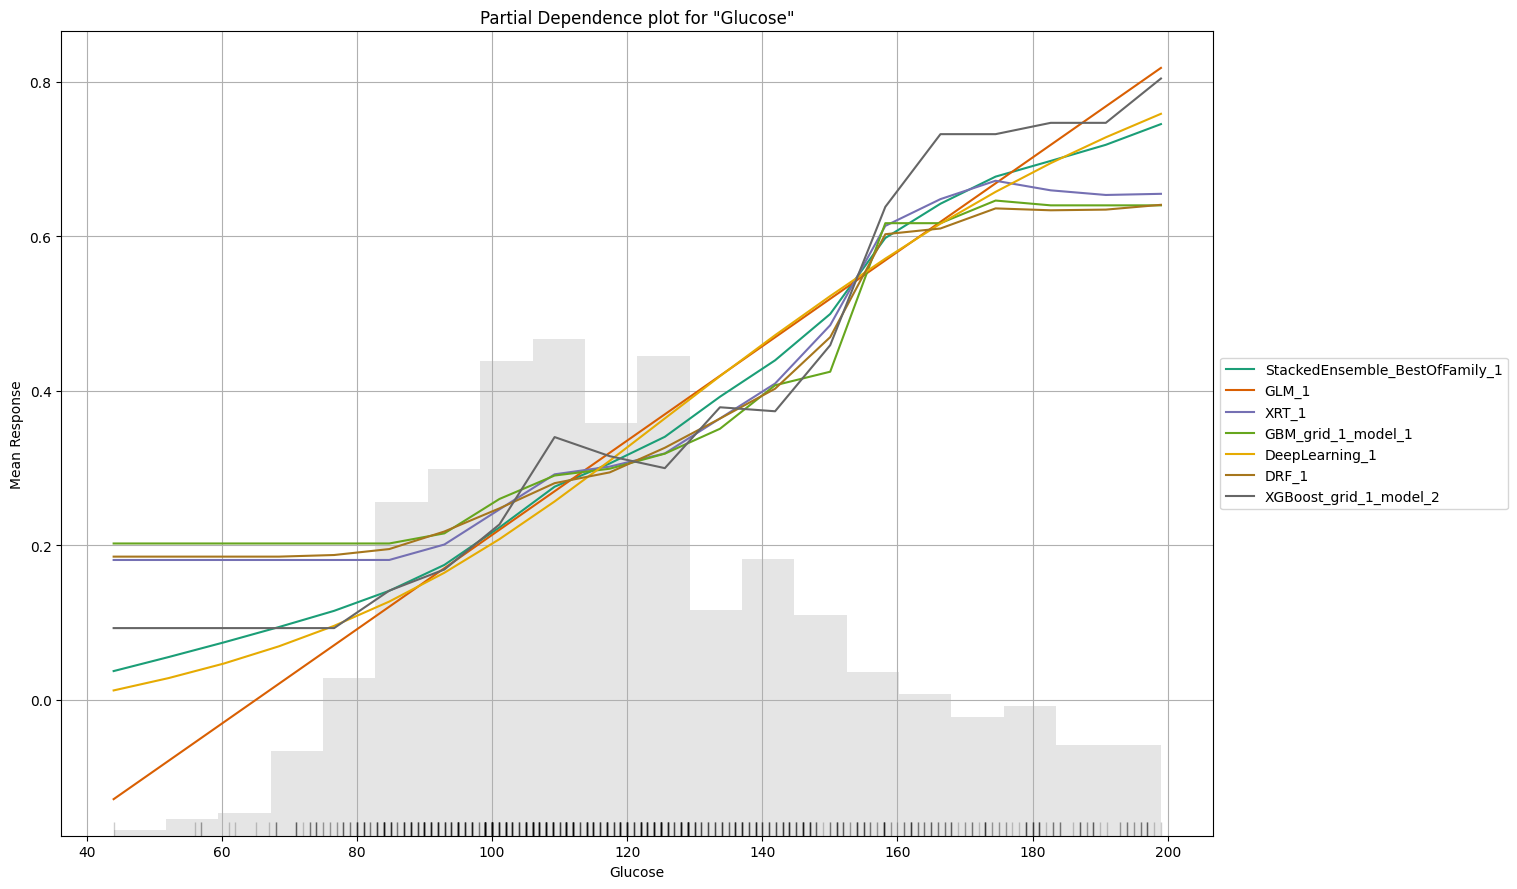

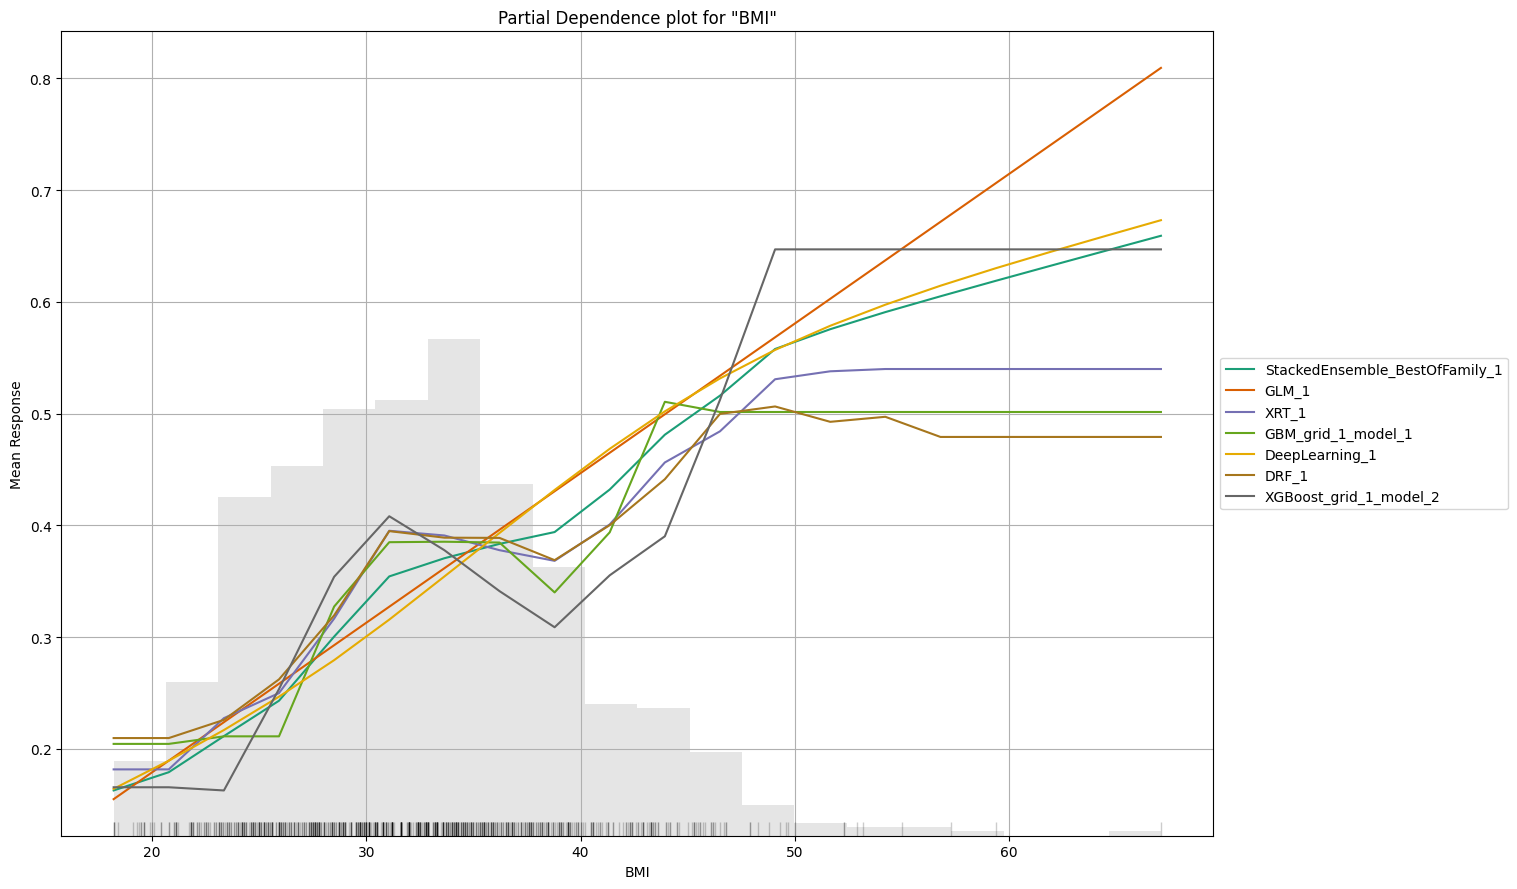

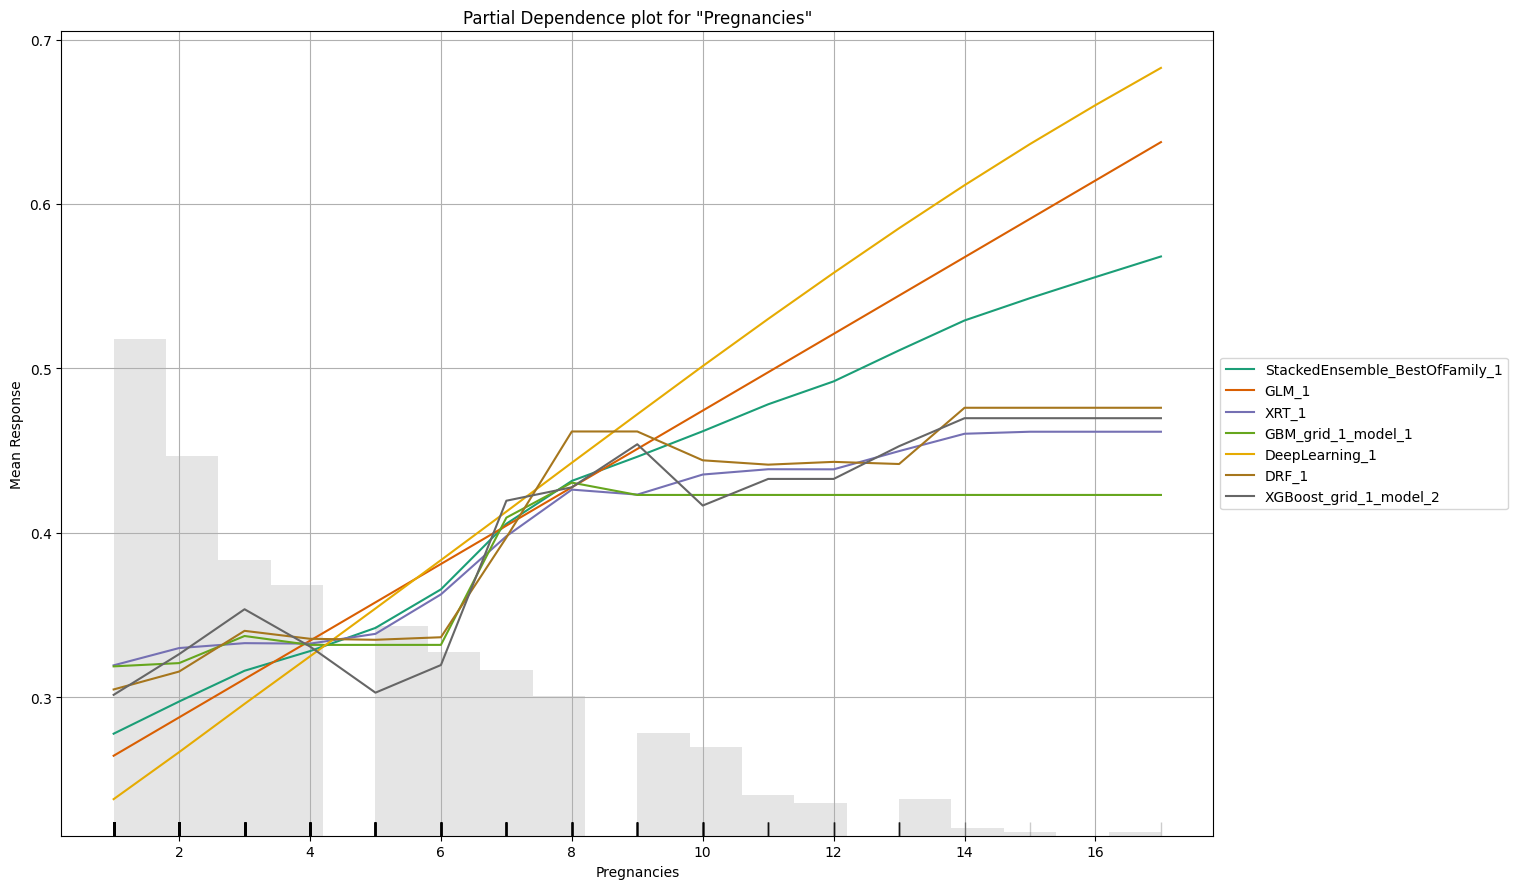

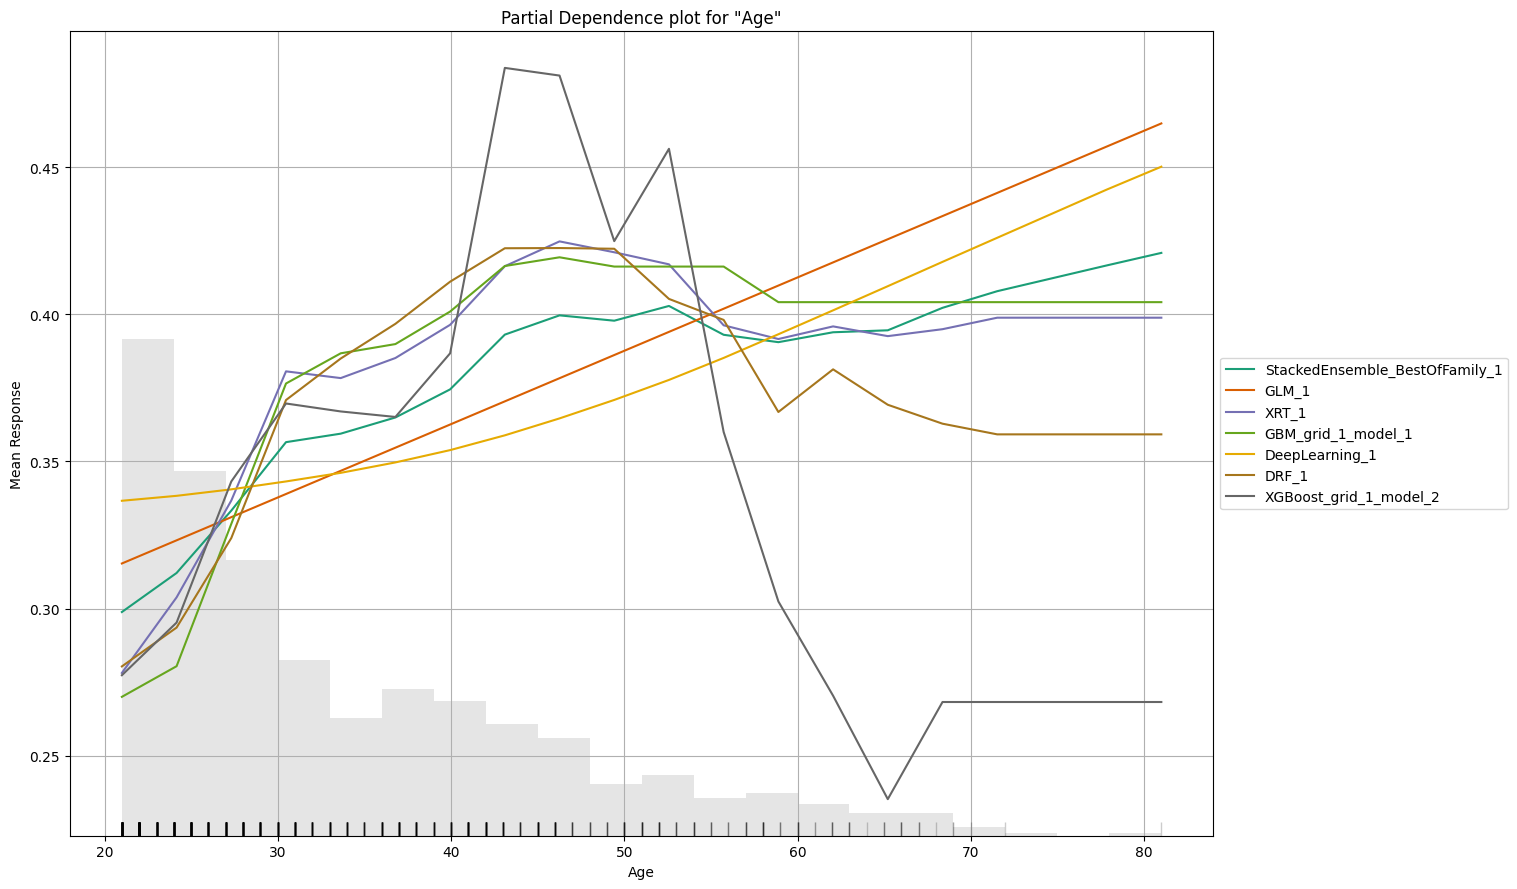

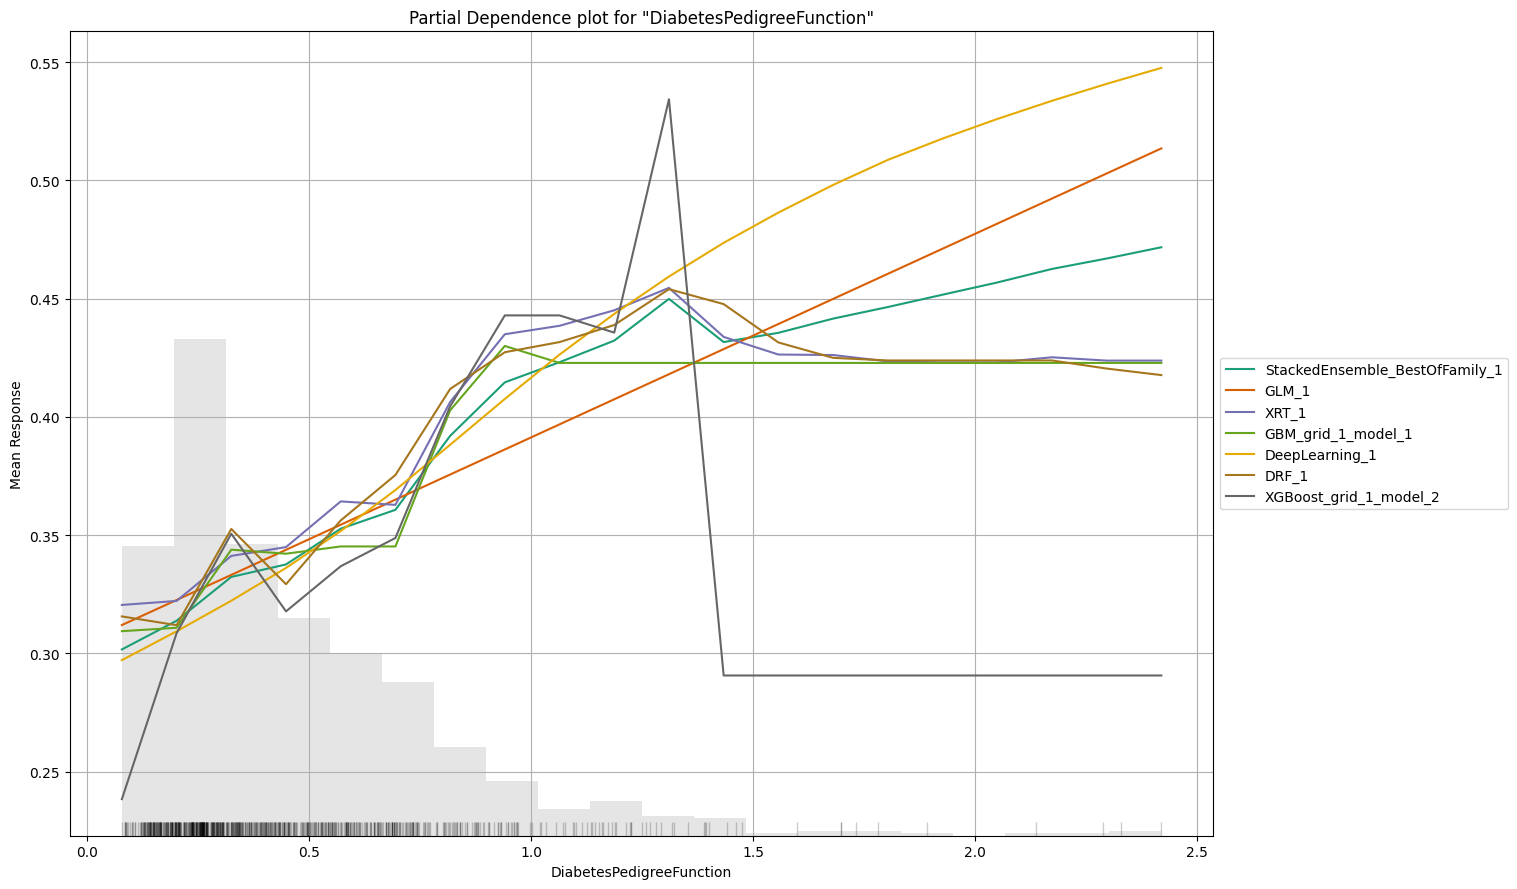

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

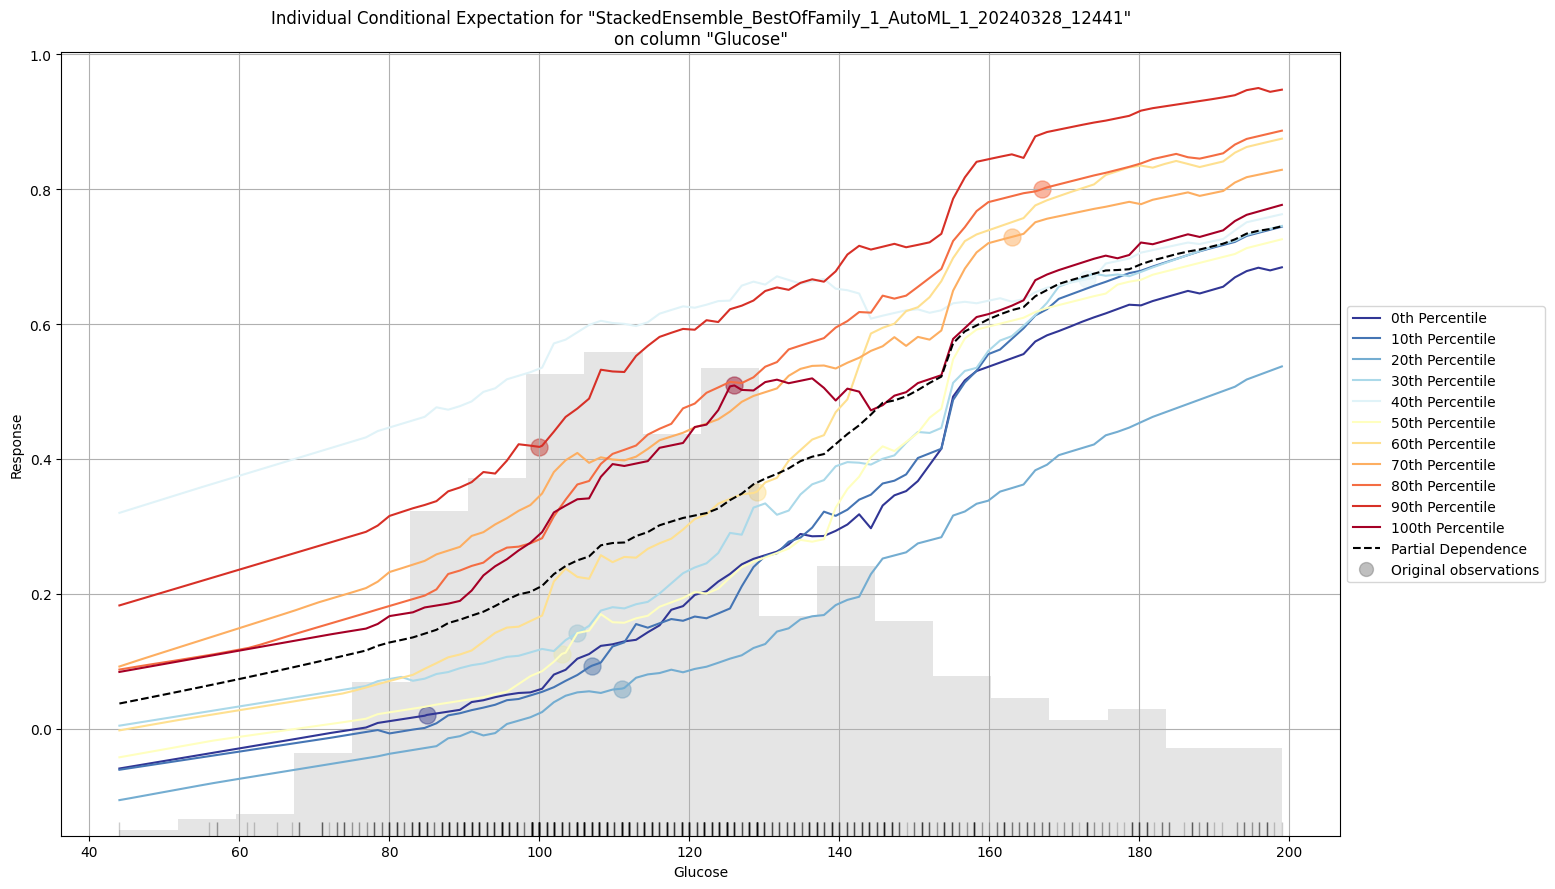

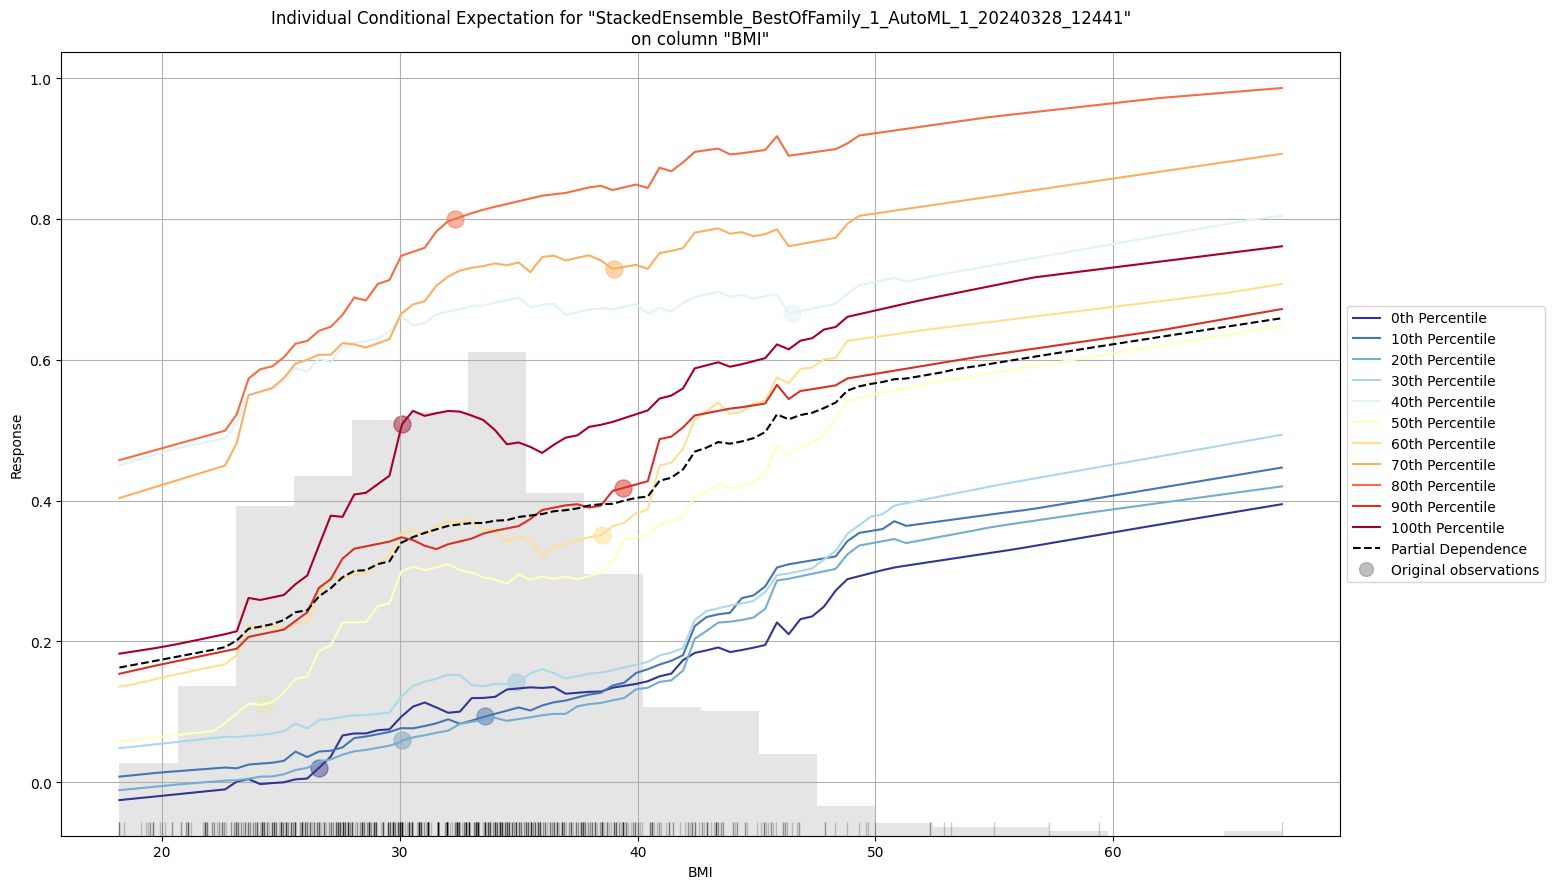

/usr/local/lib/python3.10/dist-packages/h2o/explanation/_explain.py:1728: UserWarning: Original observation of "pregnancies" for 40th Percentile is [nan, 0.6665702808075034]. Plotting of NAs is not yet supported.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/h2o/explanation/_explain.py:1728: UserWarning: Original observation of "pregnancies" for 80th Percentile is [nan, 0.7999474942123489]. Plotting of NAs is not yet supported.
  warnings.warn(msg)


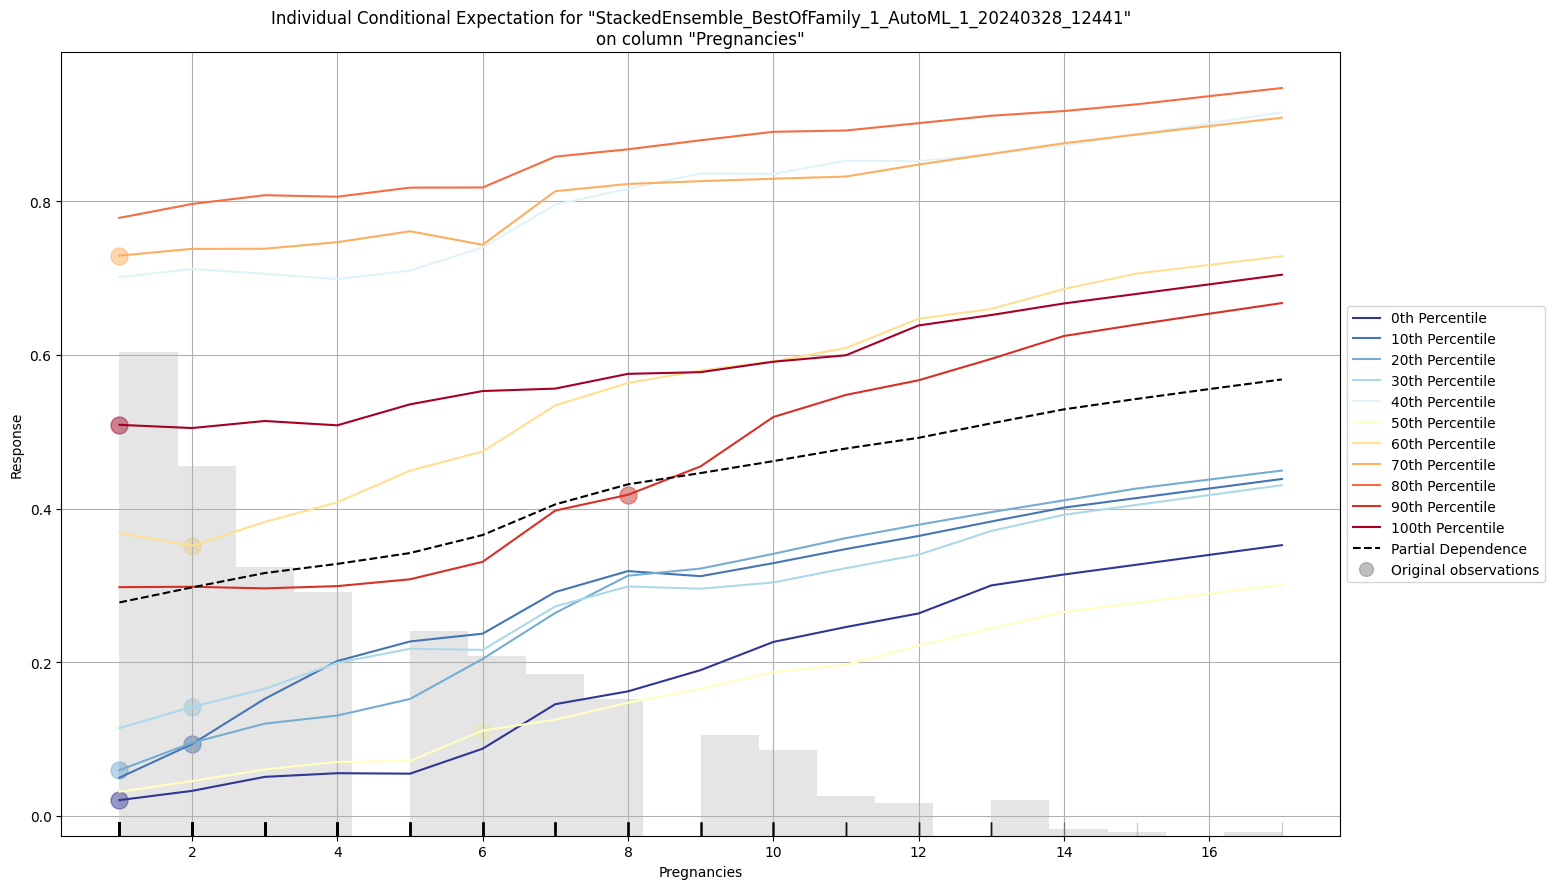

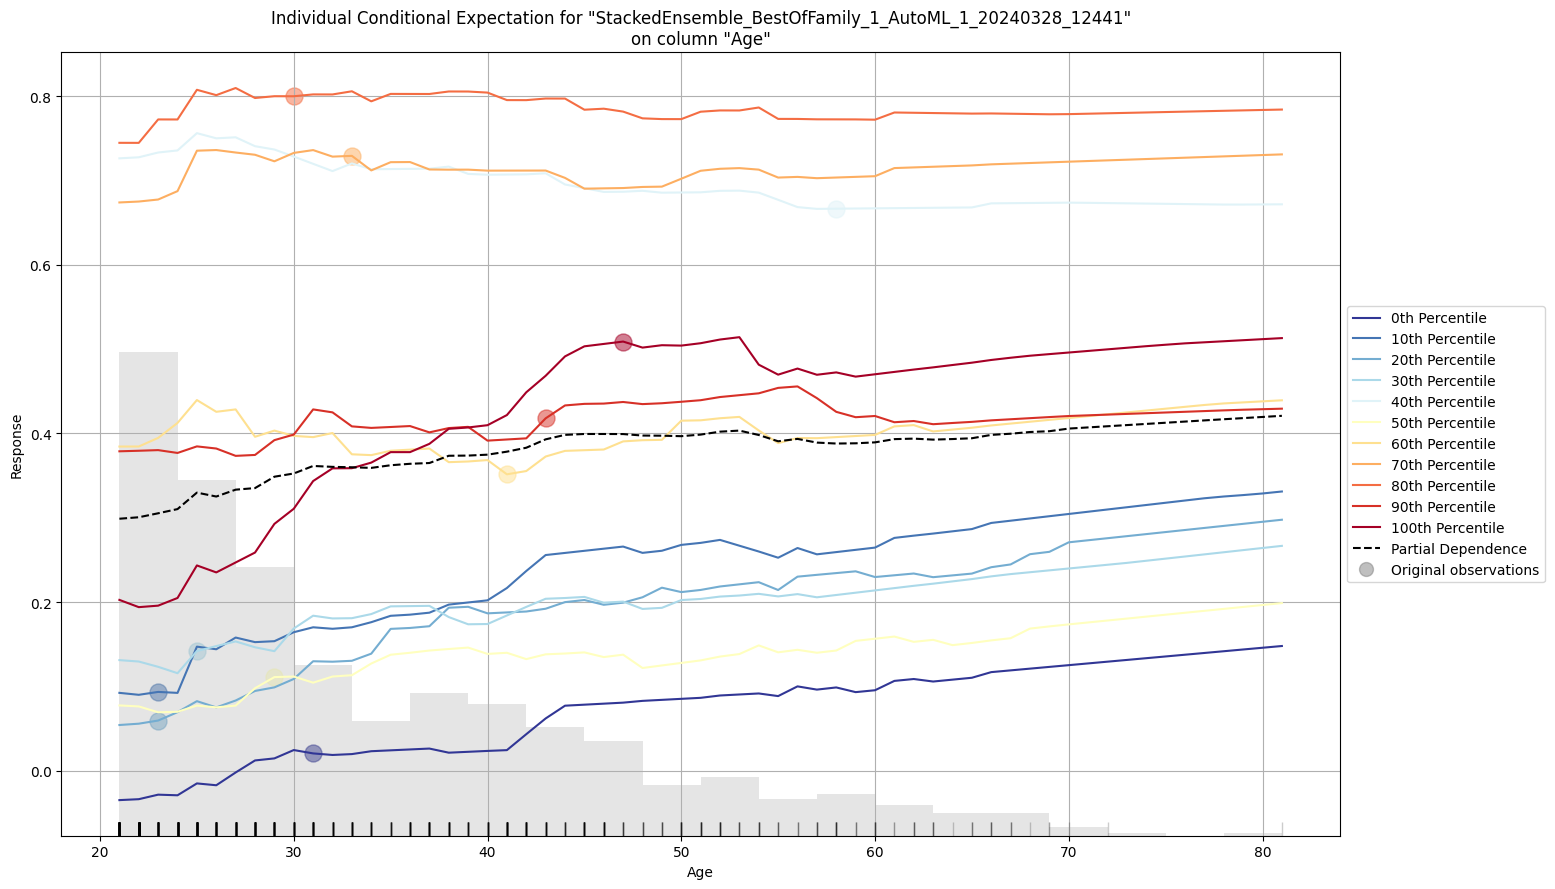

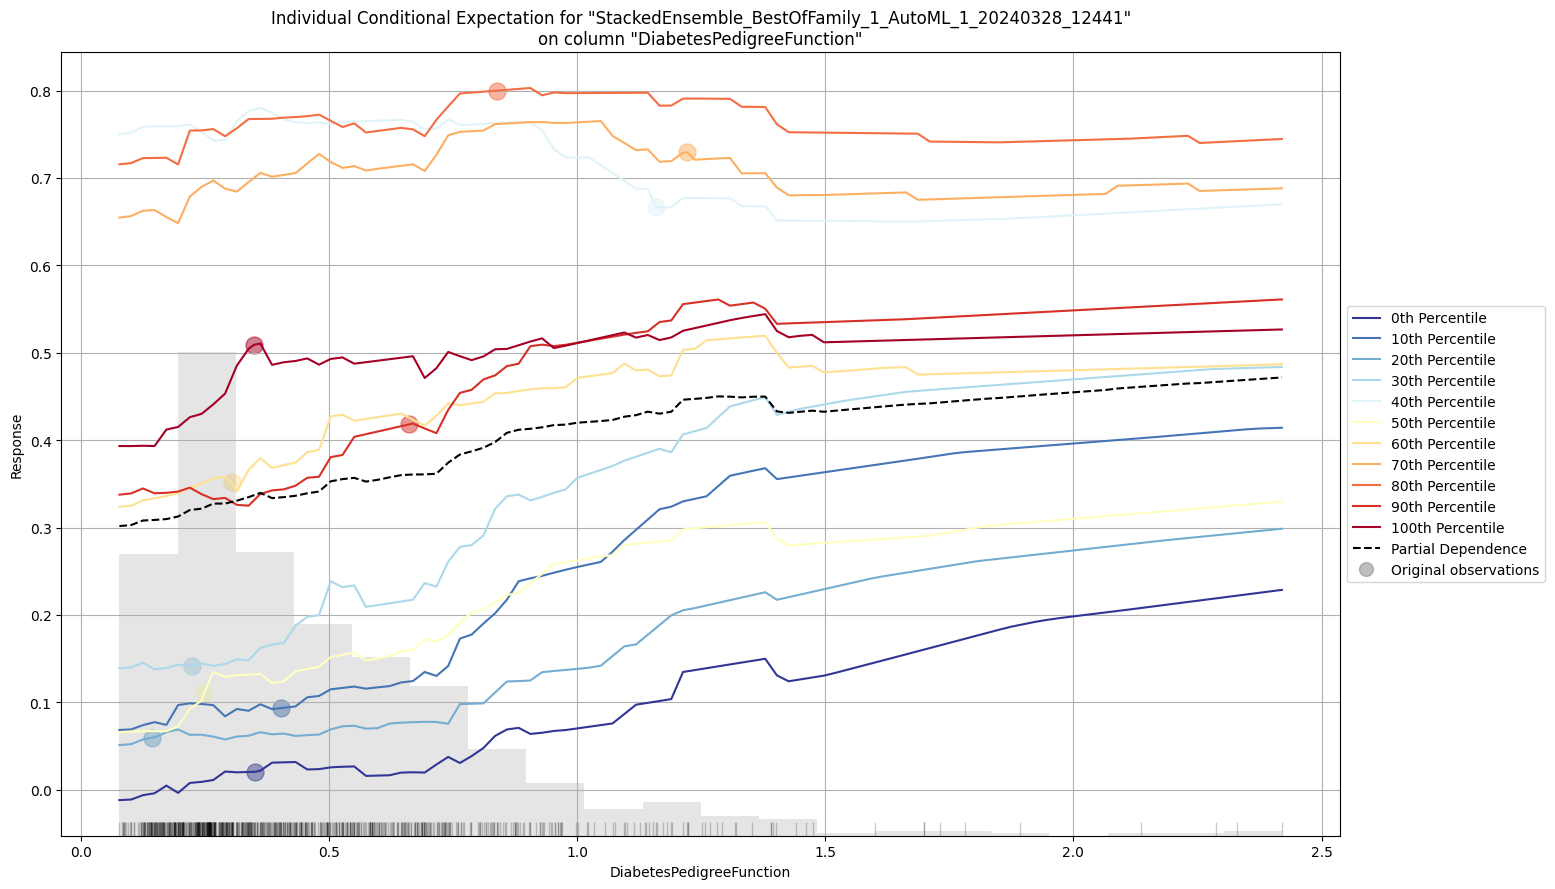

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse        mse       mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  --------  --------  ------------------------  ------------------  -------------------------  ---------------
DRF_1_AutoML_1_20240328_12441                           0.23182   0.0537405  0.165106  0.163016                 0.0537405                 308                   0.037241  DRF
XRT_1_AutoML_1_20240328_12441                           0.237866  0.0565803  0.172131  0.168031                 0.0565803                 439                   0.03481   DRF
XGBoost_2_AutoML_1_20240328_12441                       0.240604  0.0578904  0.148519  0.170739                 0.0578904                 601                   0.007644  XGBoost
XGBoost_3_AutoML_1_20240328_12441                       0.25524   0.0651475  0.174985  0.180122                 0.0651475                 384                   0.00513   XGBoost
XGBoost_grid_1_AutoML_1_20240328_12441_model_2          0.260668  0.0679477  0.186255  0.185035                 0.0679477                 142                   0.003554  XGBoost
GBM_5_AutoML_1_20240328_12441                           0.272439  0.0742232  0.206209  0.1912                   0.0742232                 189                   0.015814  GBM
XGBoost_1_AutoML_1_20240328_12441                       0.272505  0.0742589  0.194503  0.194392                 0.0742589                 252                   0.003932  XGBoost
GBM_4_AutoML_1_20240328_12441                           0.299929  0.0899573  0.234577  0.210343                 0.0899573                 213                   0.019265  GBM
GBM_3_AutoML_1_20240328_12441                           0.301551  0.090933   0.238786  0.211376                 0.090933                  159                   0.018143  GBM
GBM_2_AutoML_1_20240328_12441                           0.302413  0.0914535  0.236056  0.212307                 0.0914535                 218                   0.021223  GBM
XGBoost_grid_1_AutoML_1_20240328_12441_model_1          0.312965  0.0979468  0.235515  0.222856                 0.0979468                 244                   0.003285  XGBoost
StackedEnsemble_AllModels_1_AutoML_1_20240328_12441     0.313454  0.0982533  0.250159  0.219857                 0.0982533                 881                   0.10072   StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240328_12441  0.315269  0.0993949  0.252655  0.221217                 0.0993949                 700                   0.057832  StackedEnsemble
GBM_grid_1_AutoML_1_20240328_12441_model_1              0.371501  0.138013   0.311172  0.260851                 0.138013                   60                   0.016633  GBM
GBM_1_AutoML_1_20240328_12441                           0.382638  0.146412   0.316066  0.267931                 0.146412                  235                   0.028979  GBM
DeepLearning_1_AutoML_1_20240328_12441                  0.384944  0.148182   0.305247  0.269578                 0.148182                  170                   0.013951  DeepLearning
GLM_1_AutoML_1_20240328_12441                           0.393448  0.154802   0.327749  0.276757                 0.154802                   30                   0.002111  GLM
[17 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

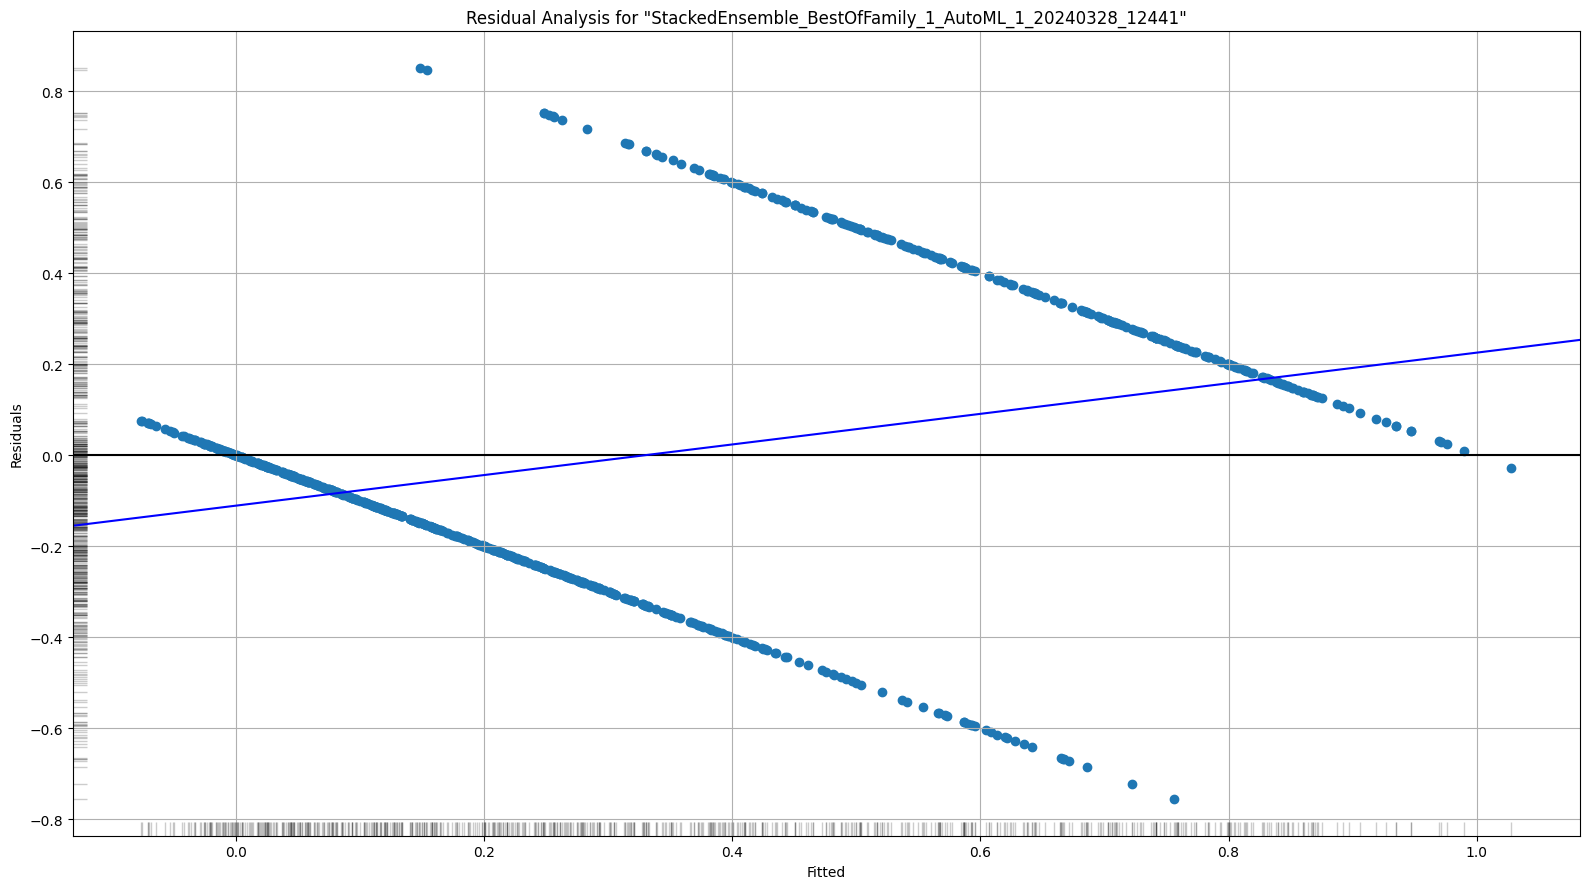

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

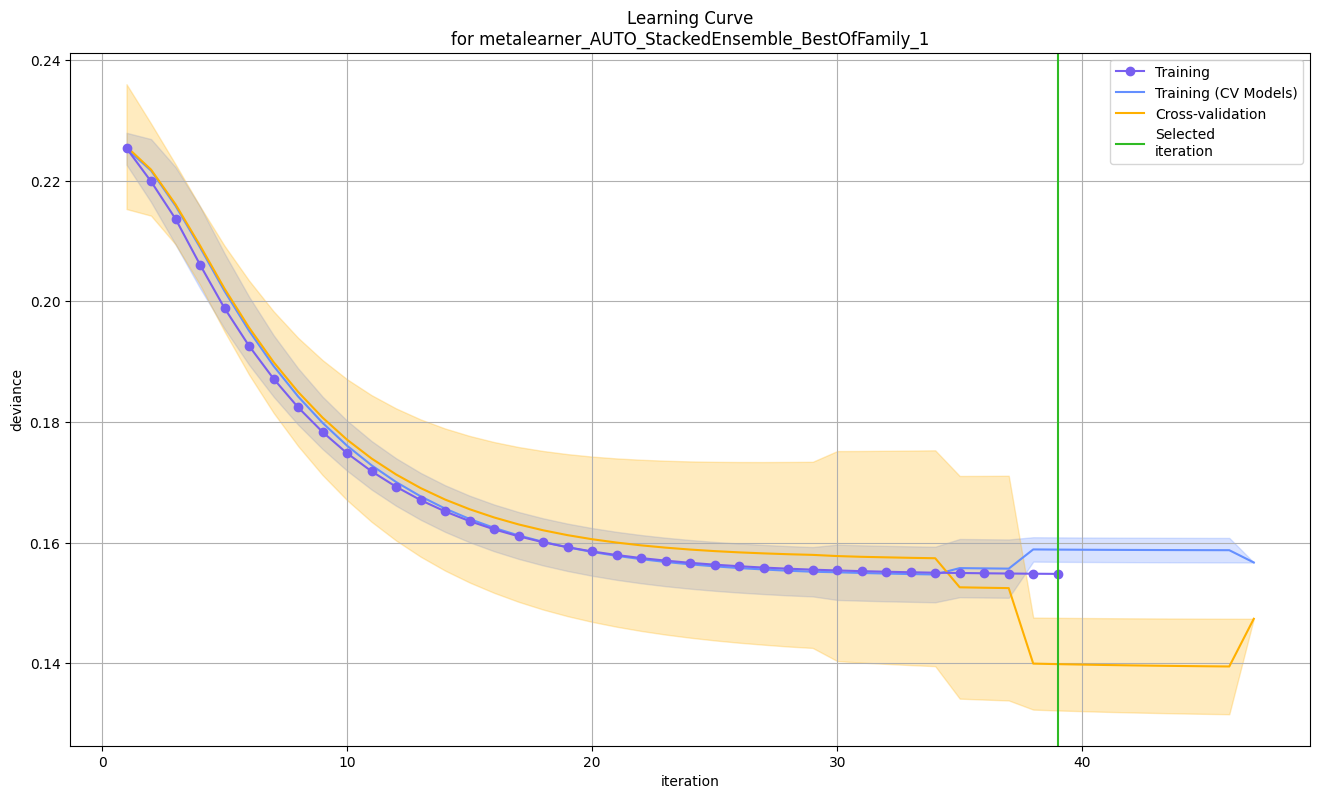

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

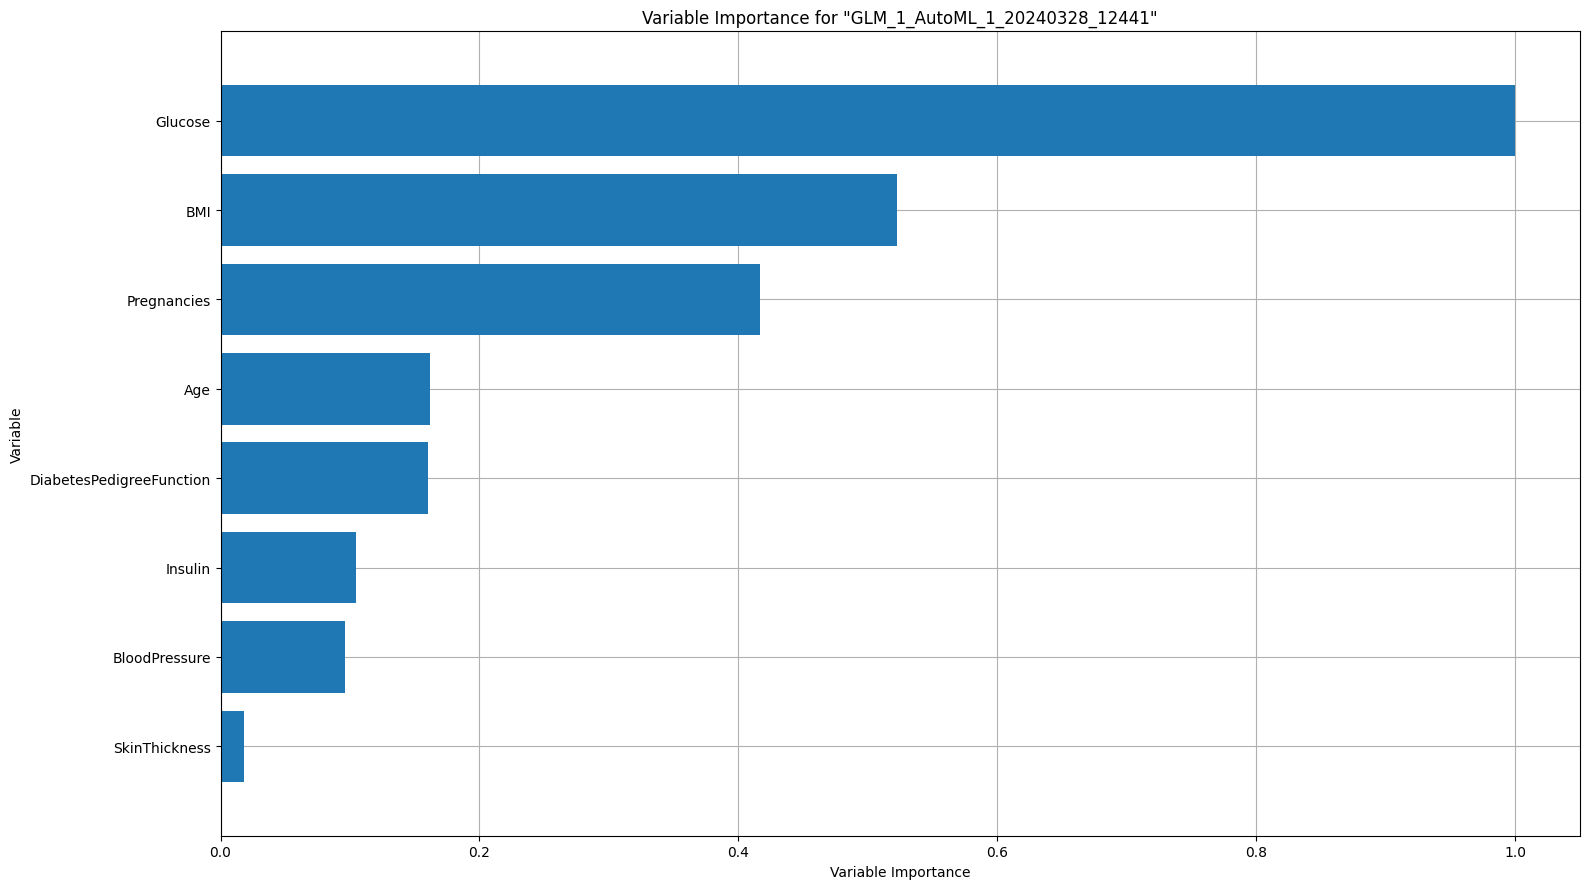

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

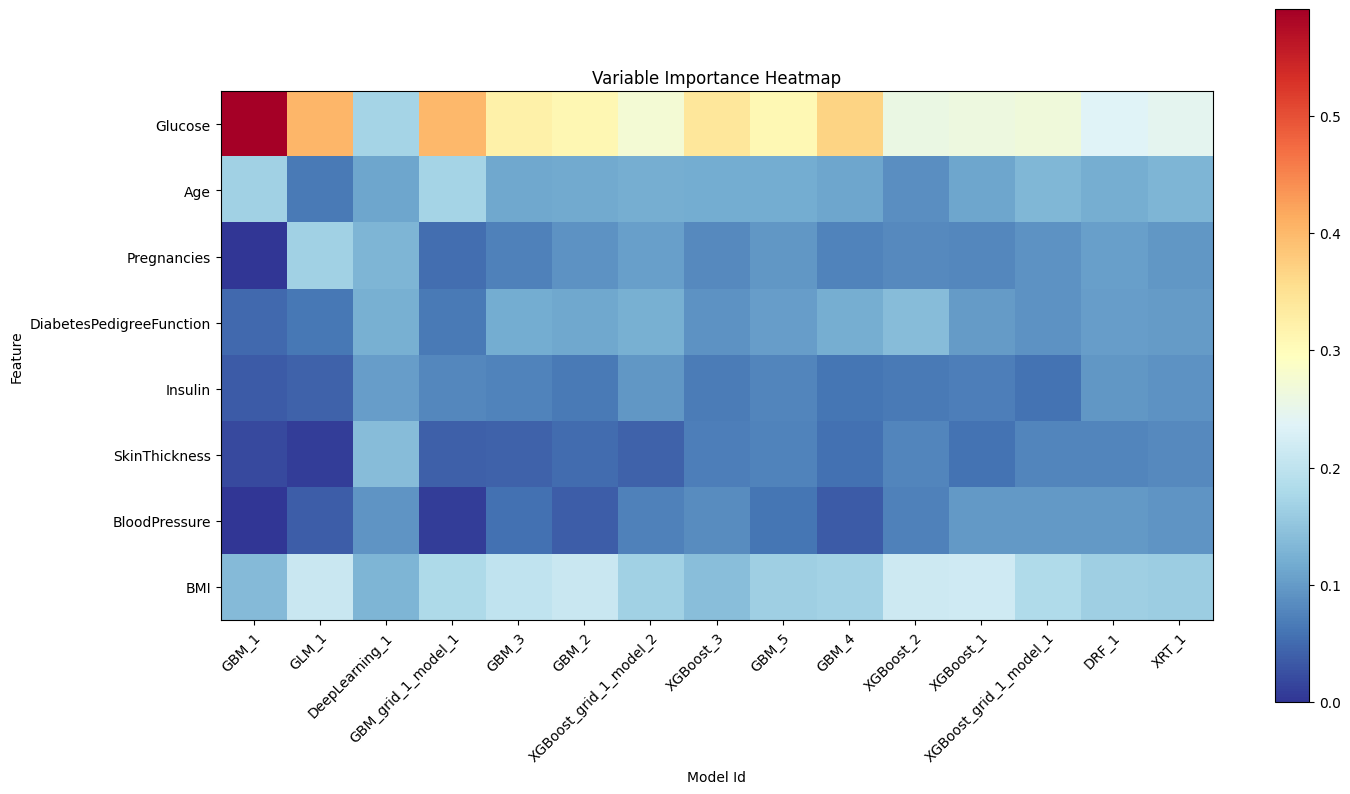

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

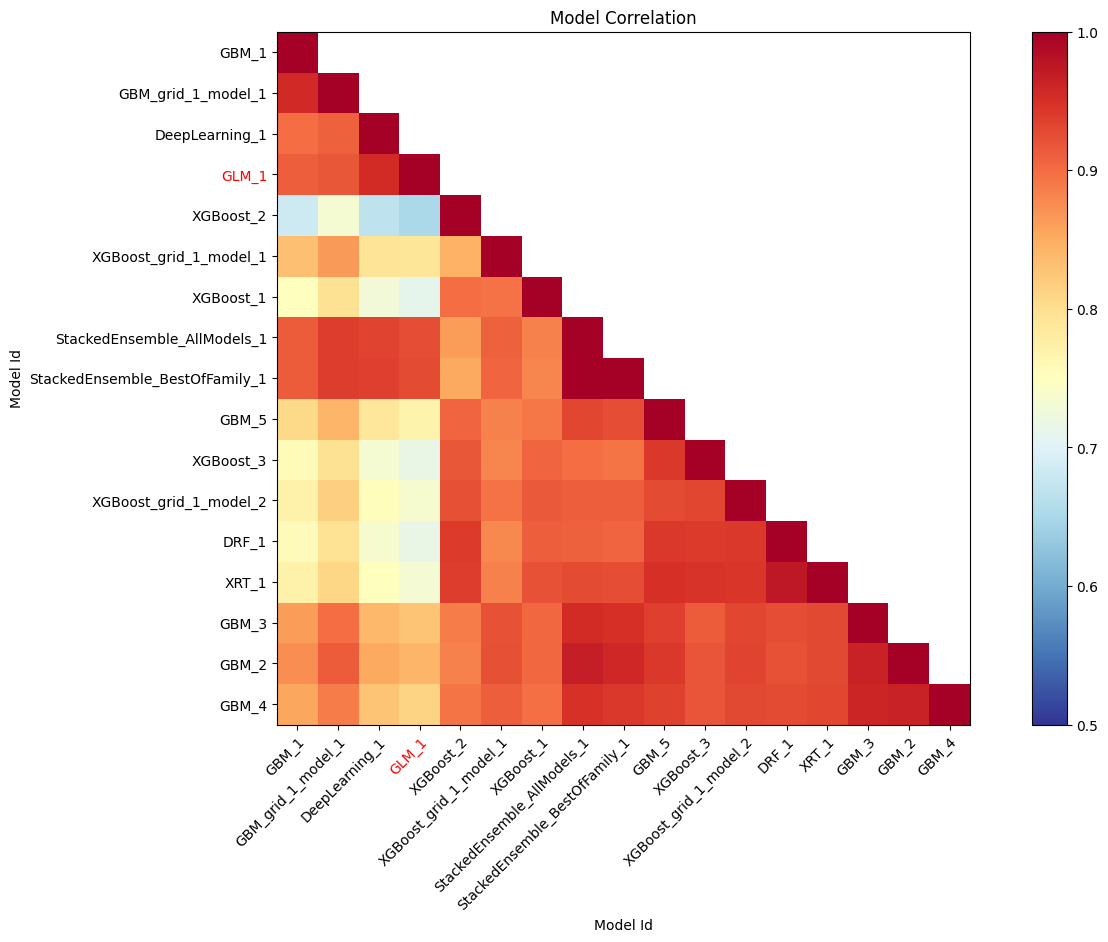

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

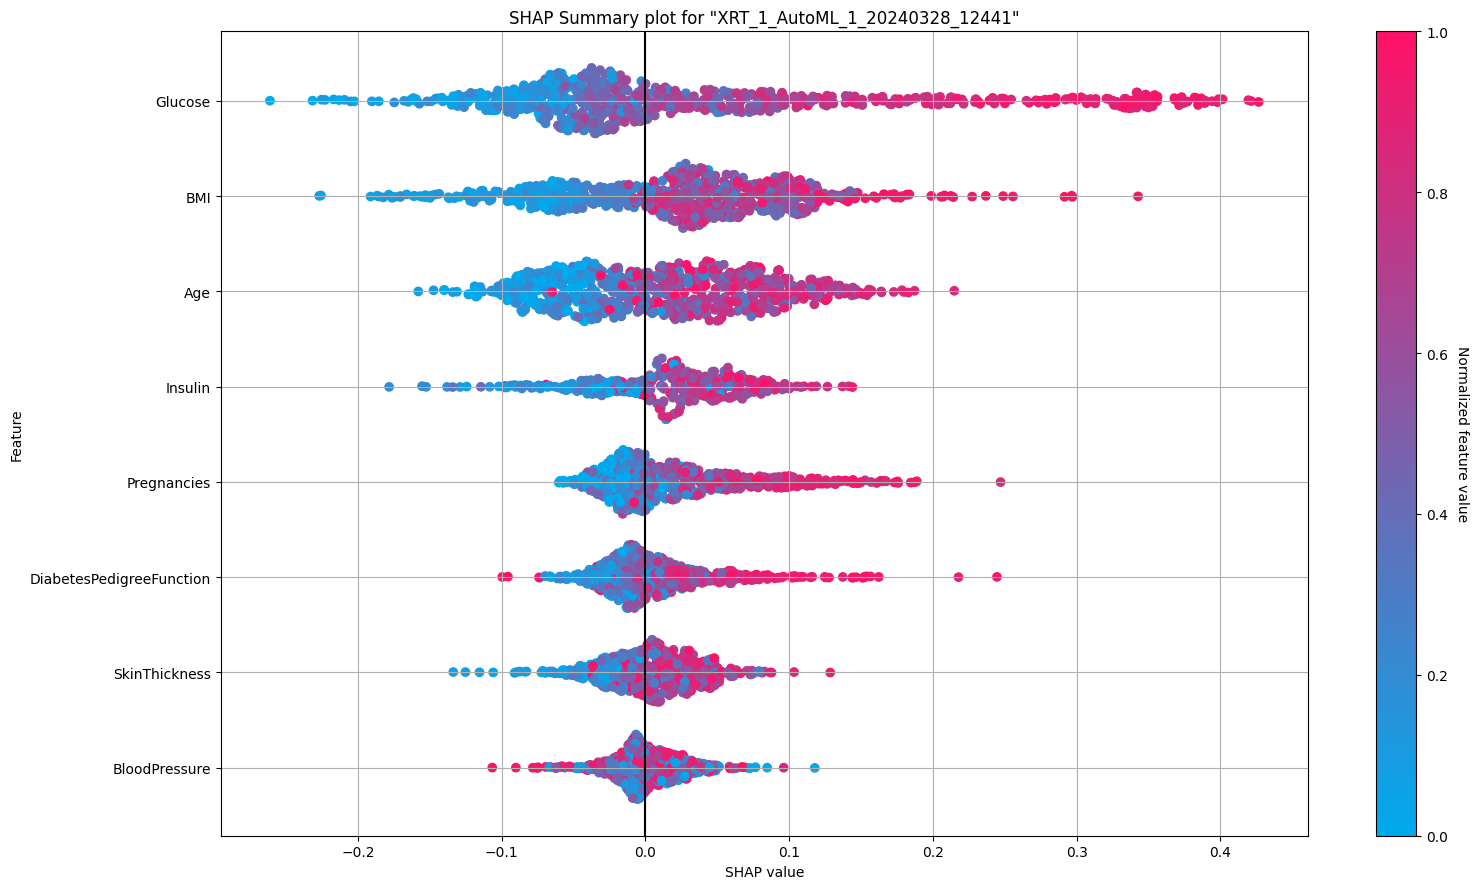

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

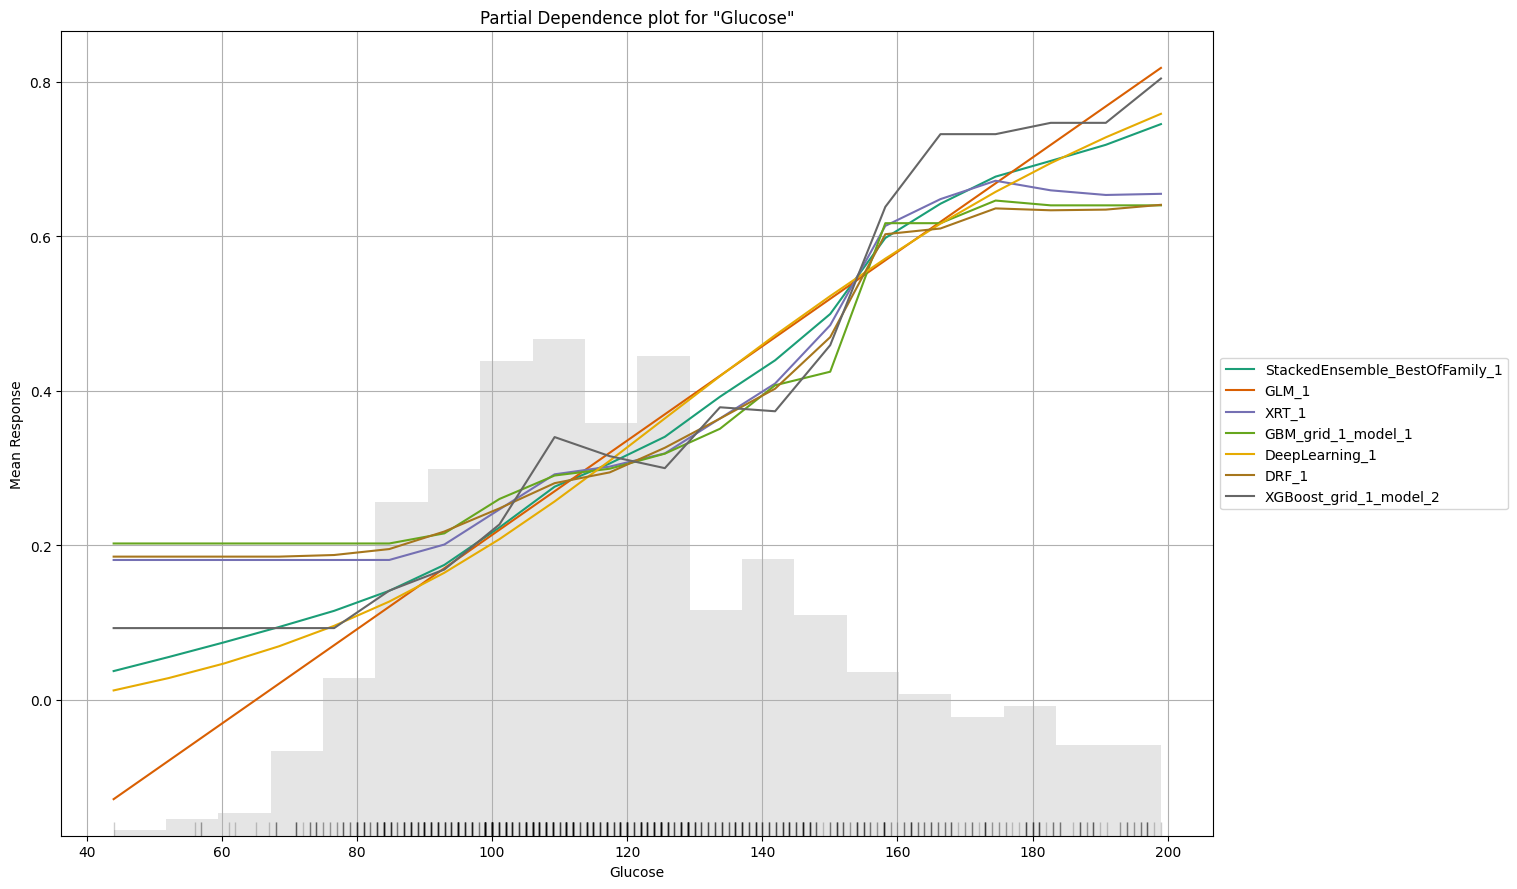

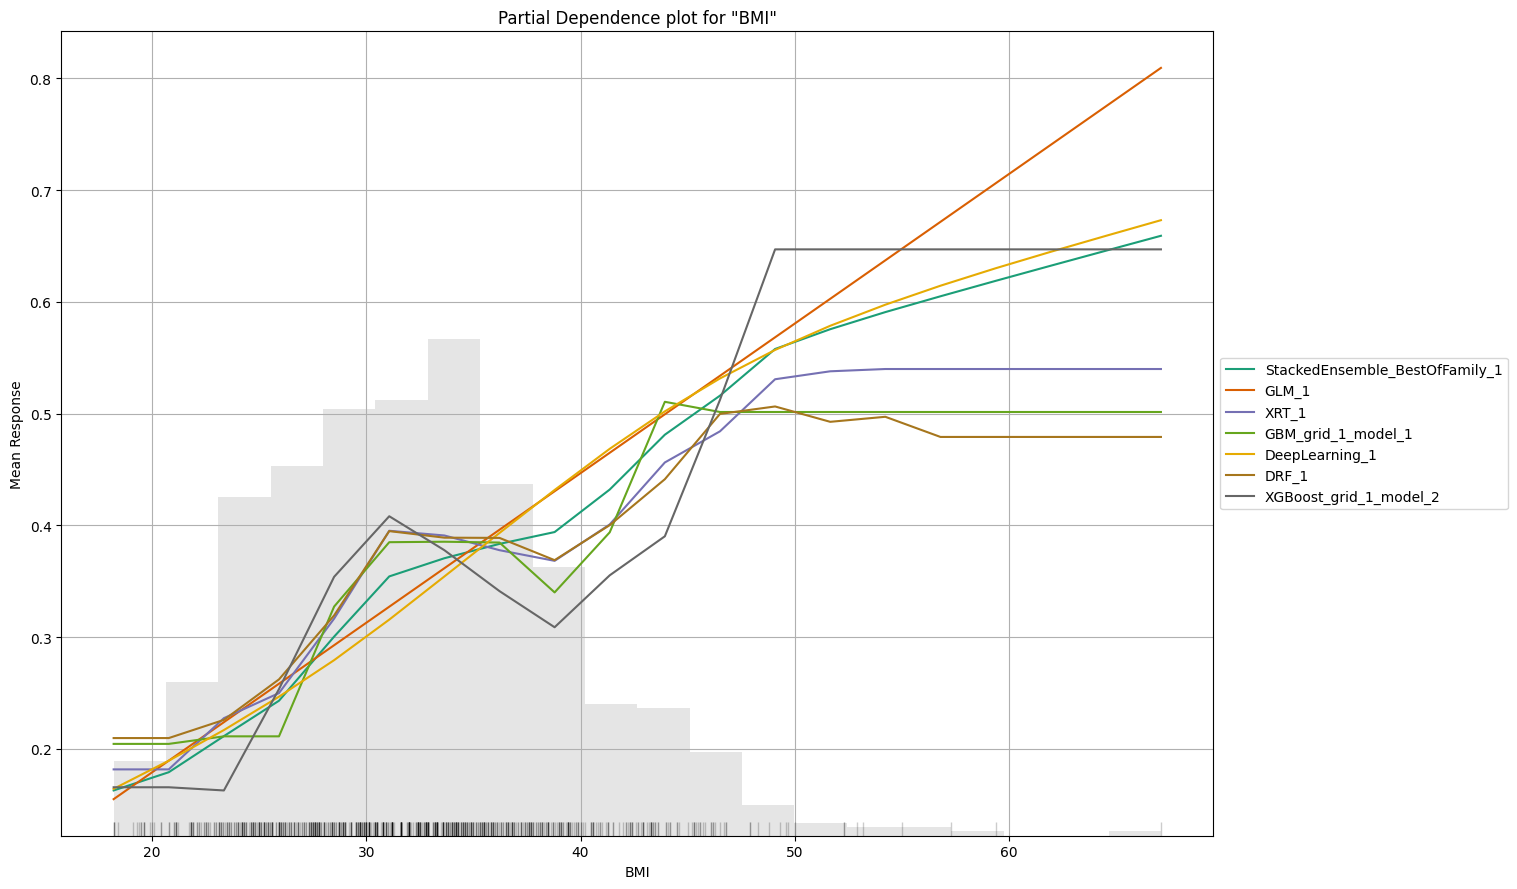

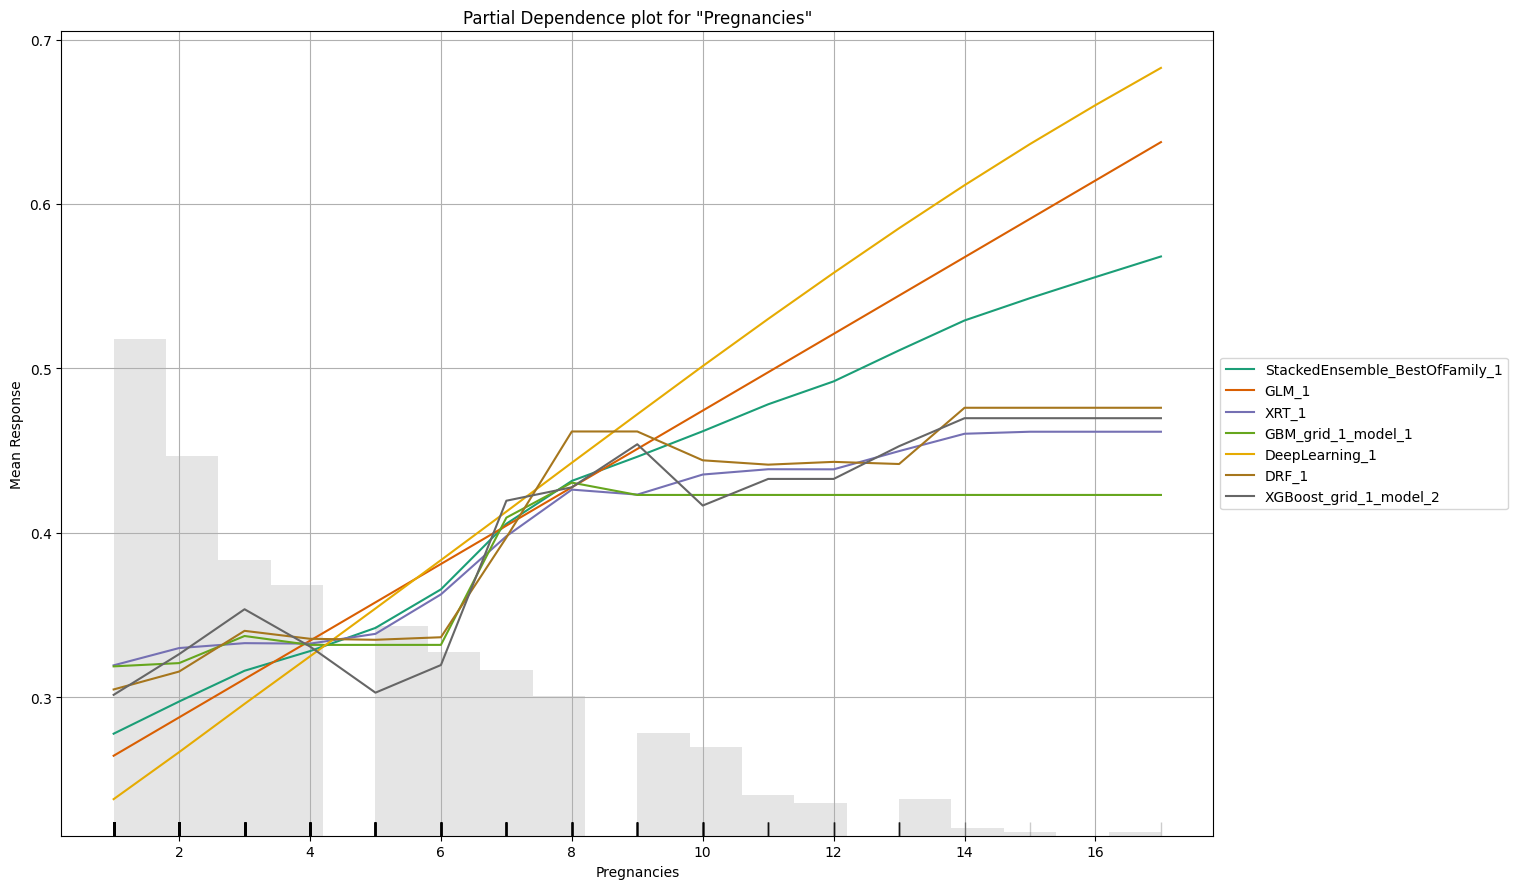

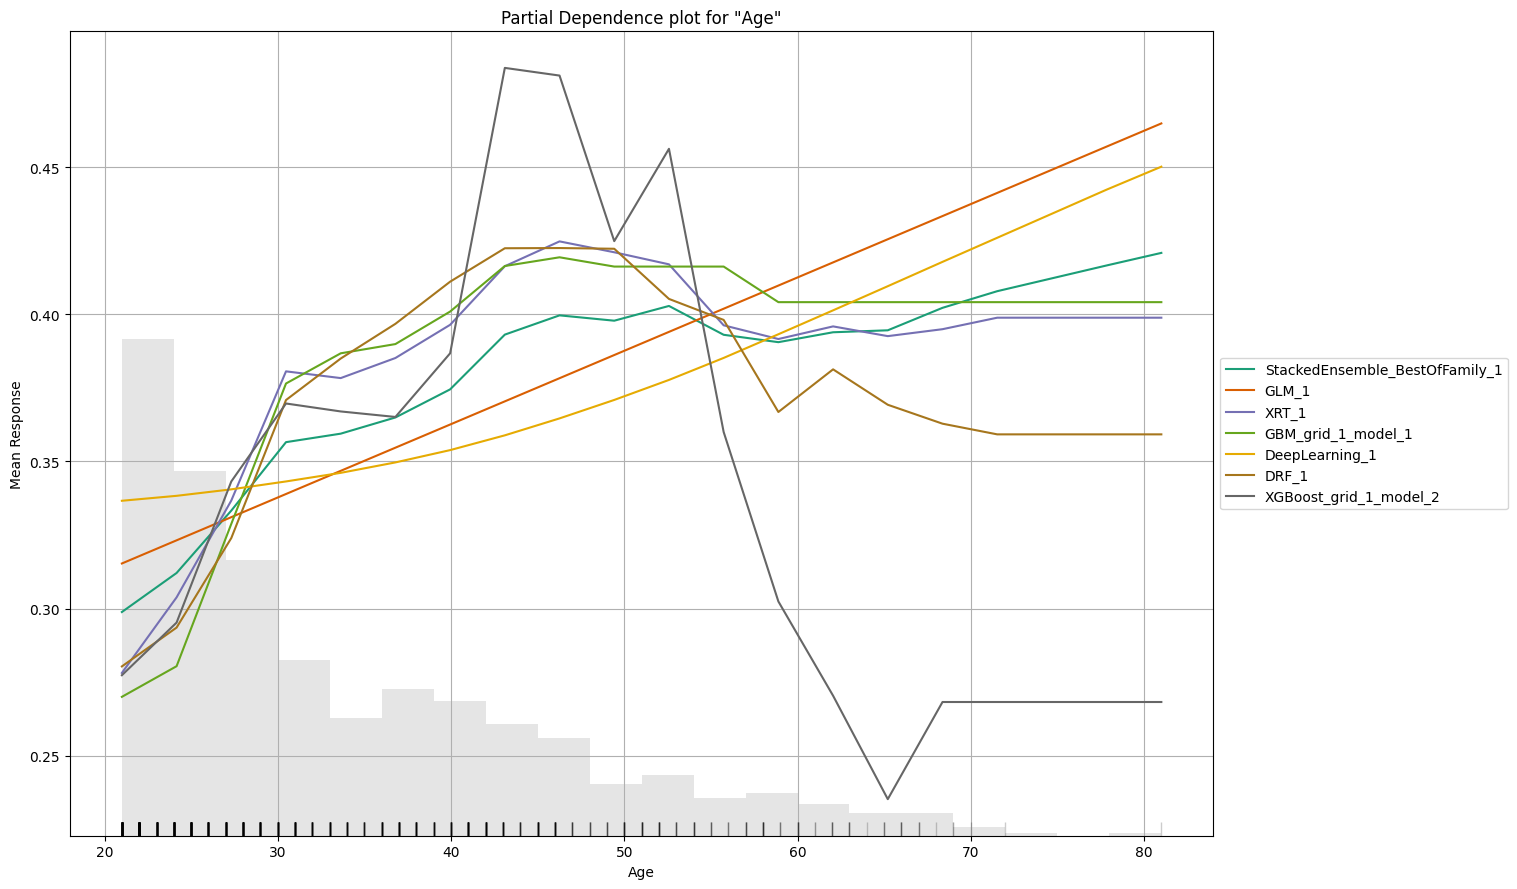

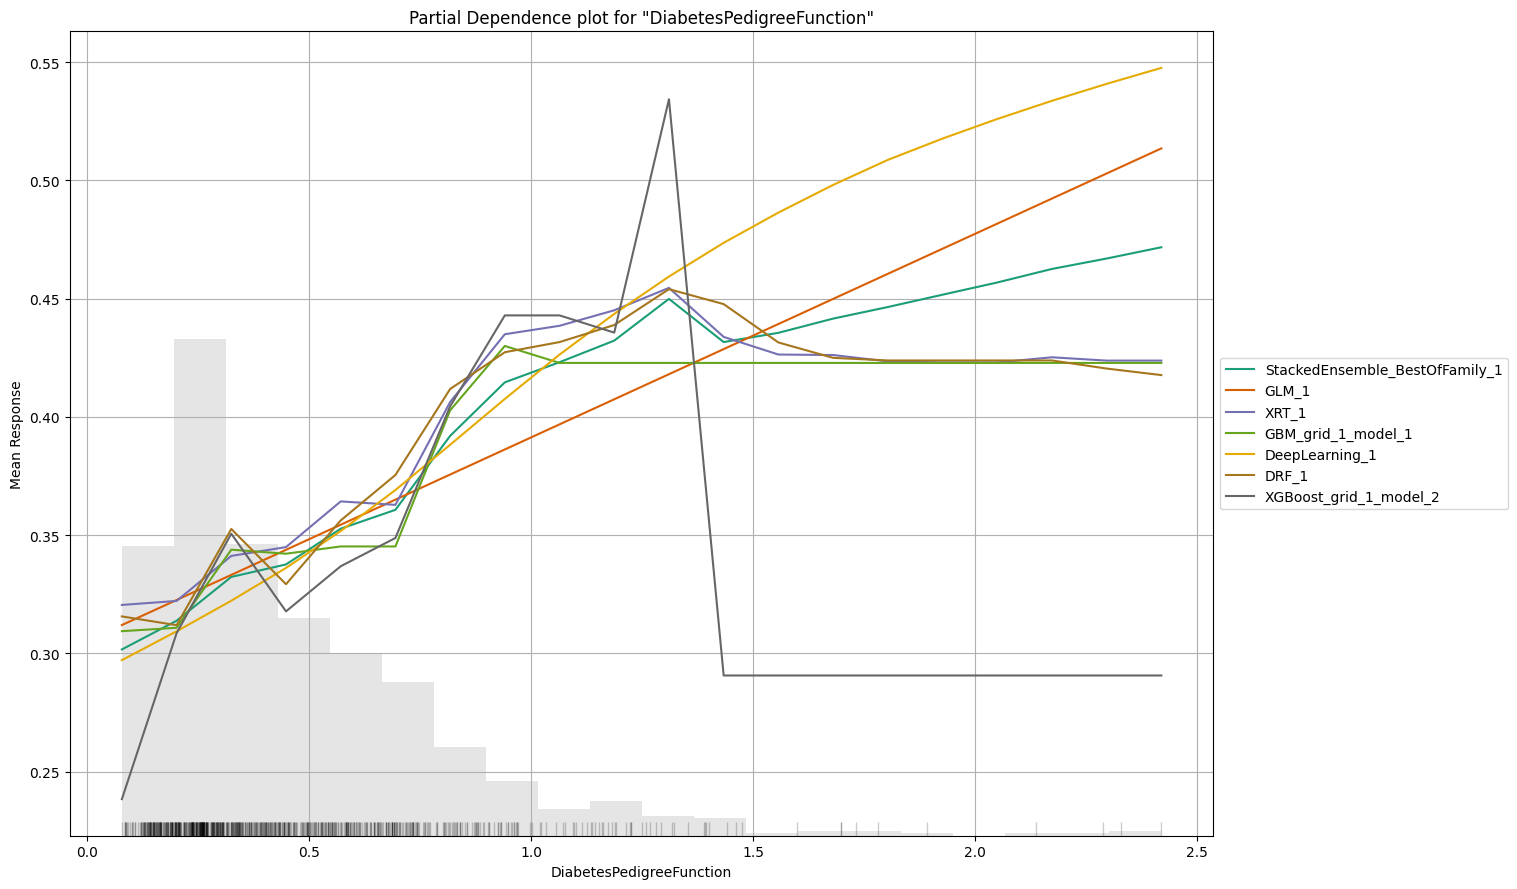

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

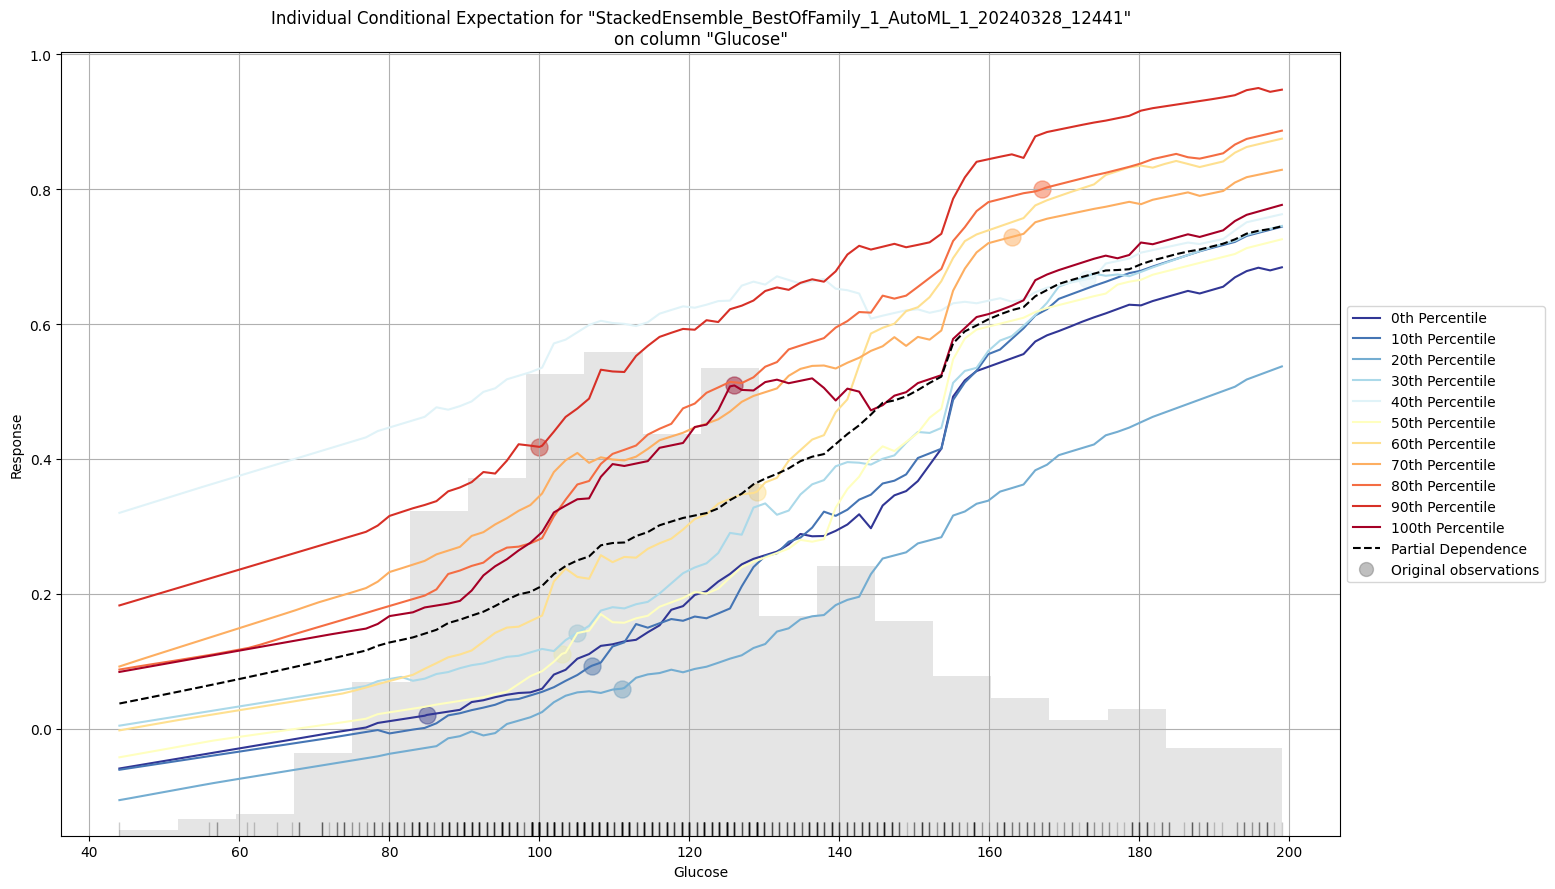

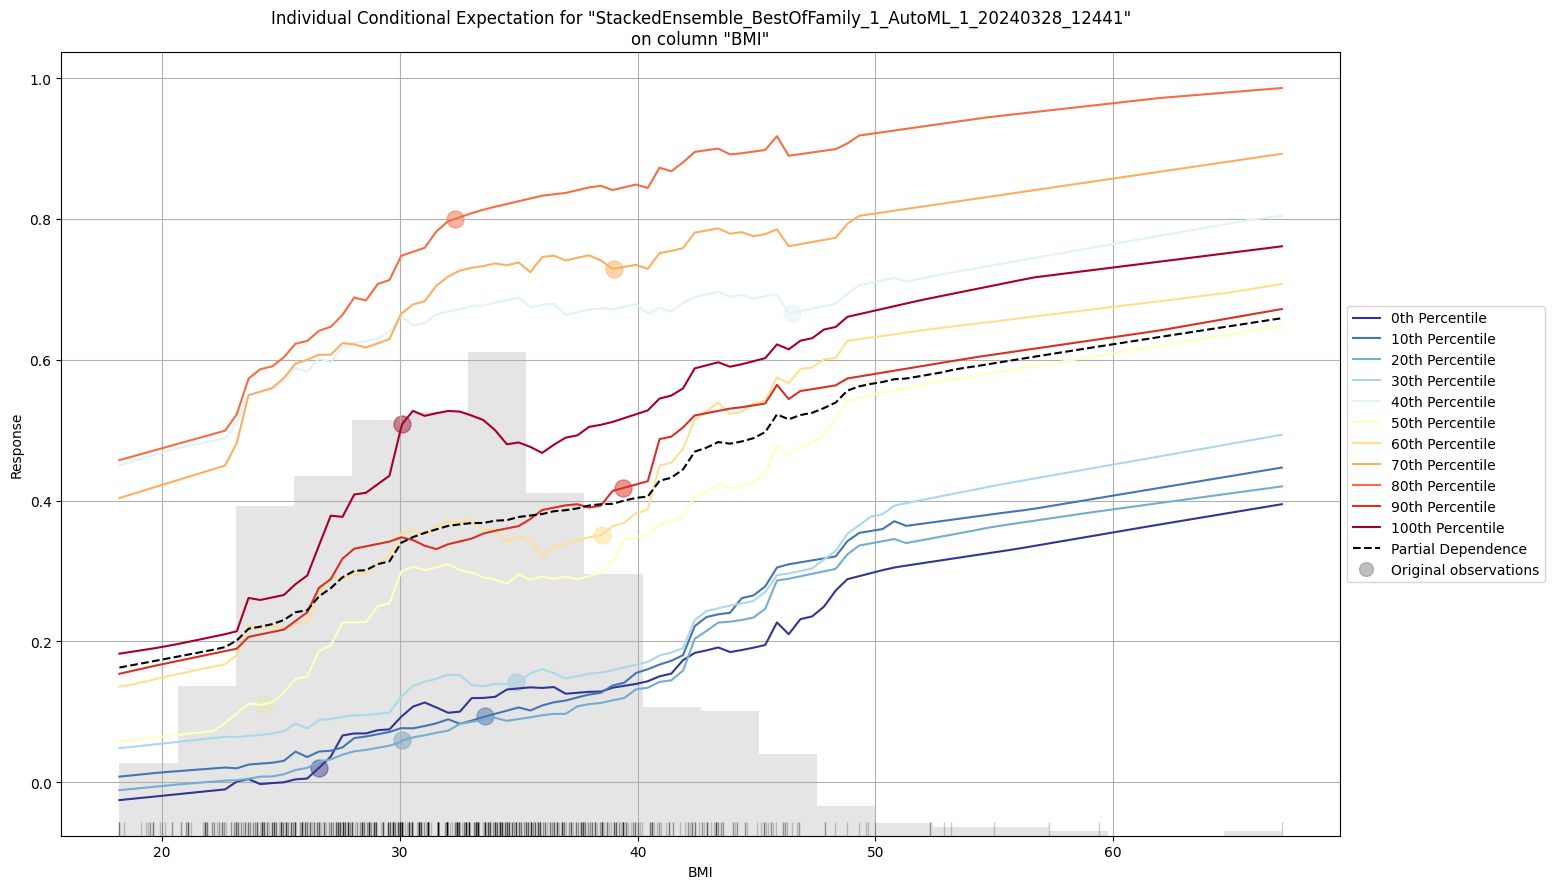

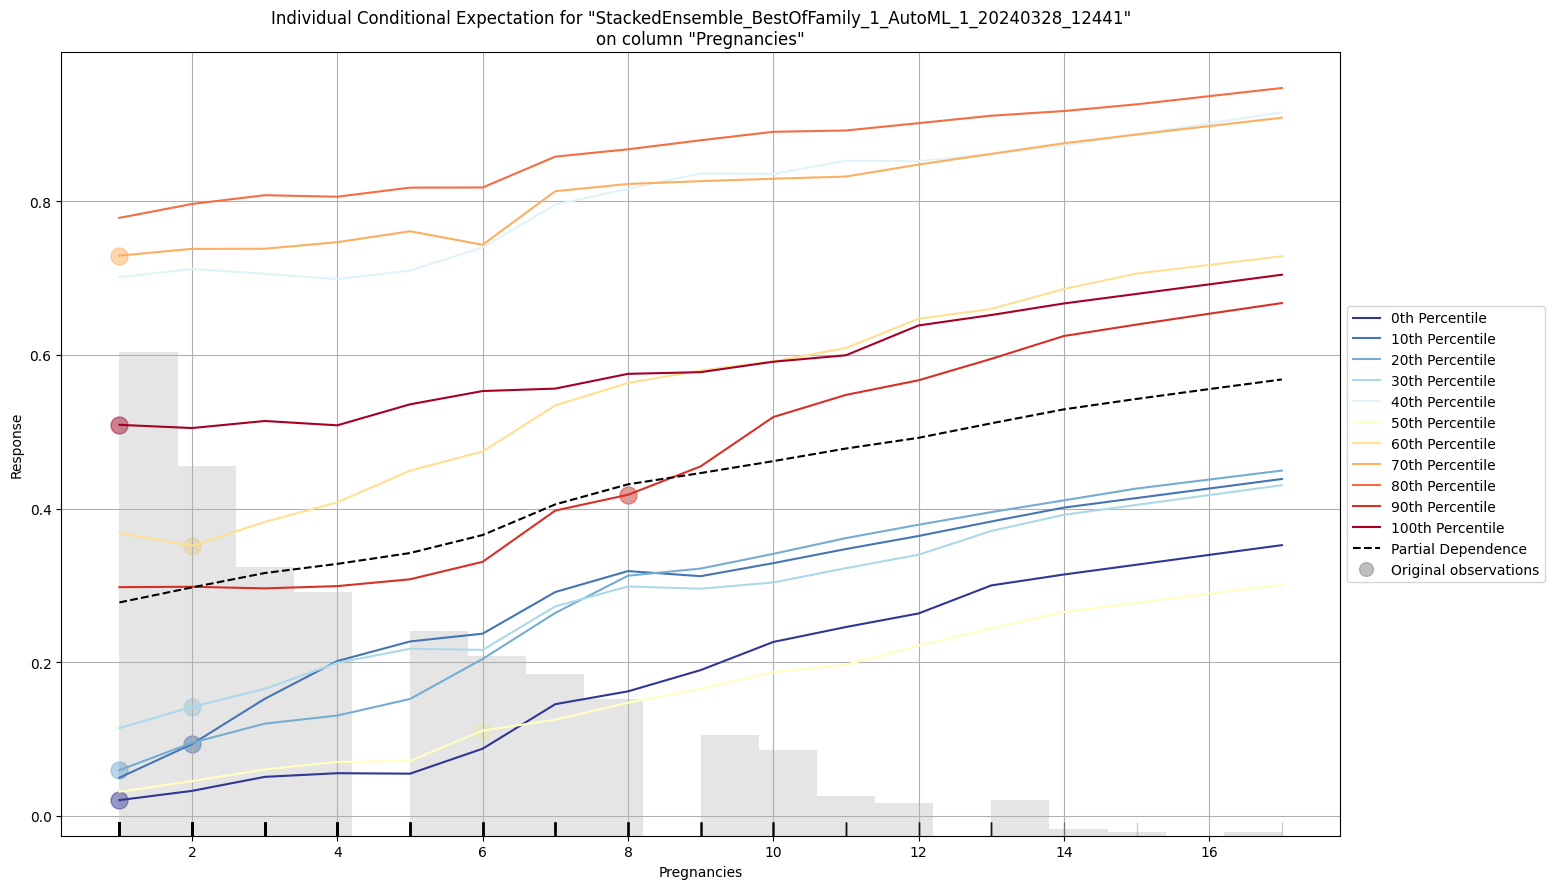

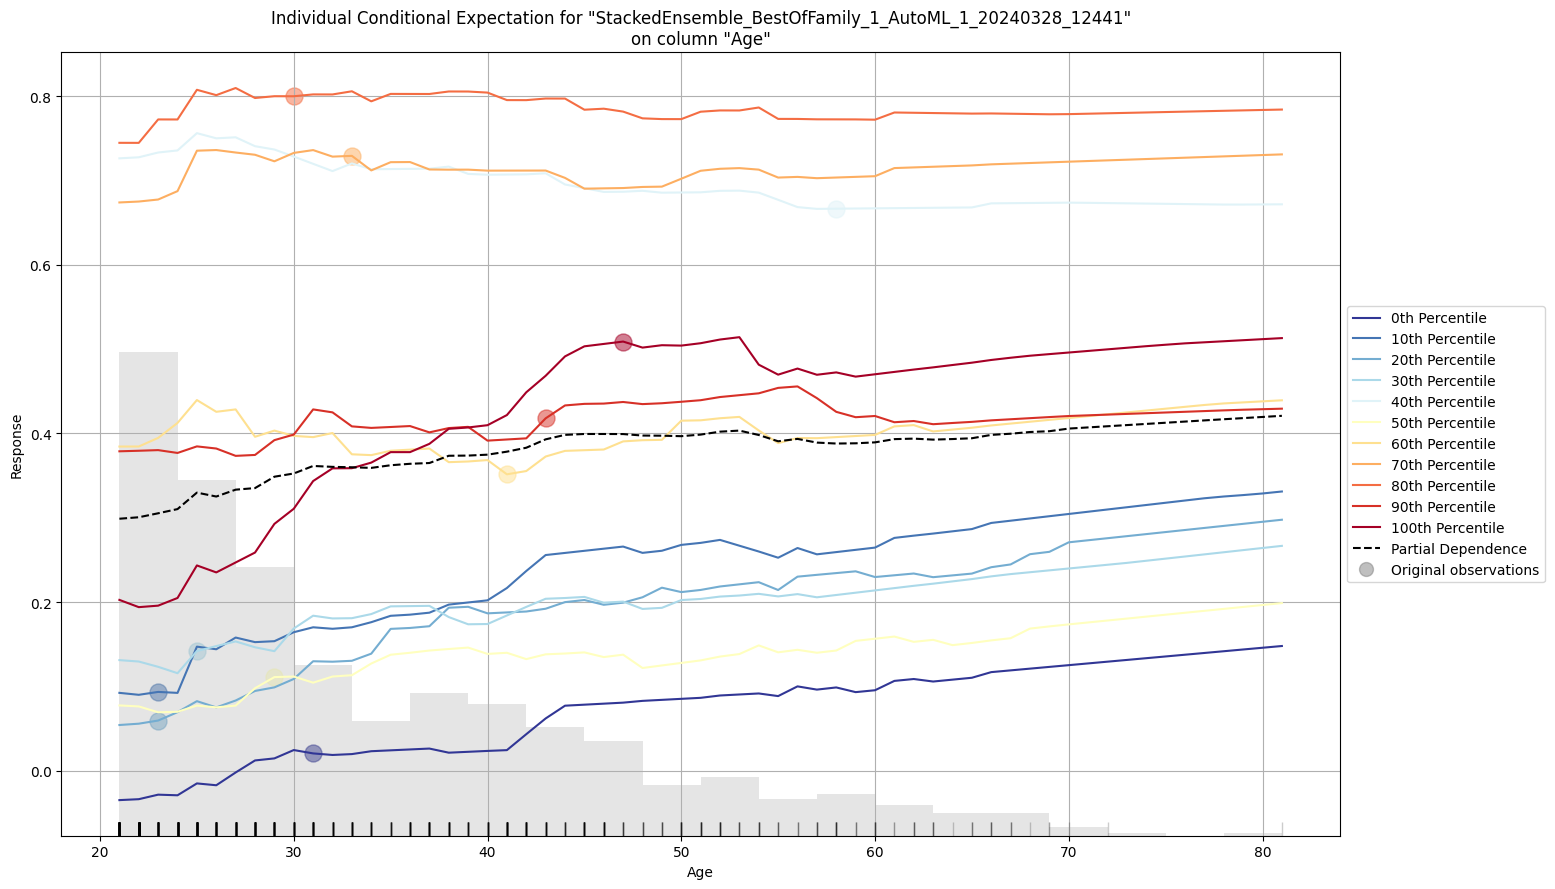

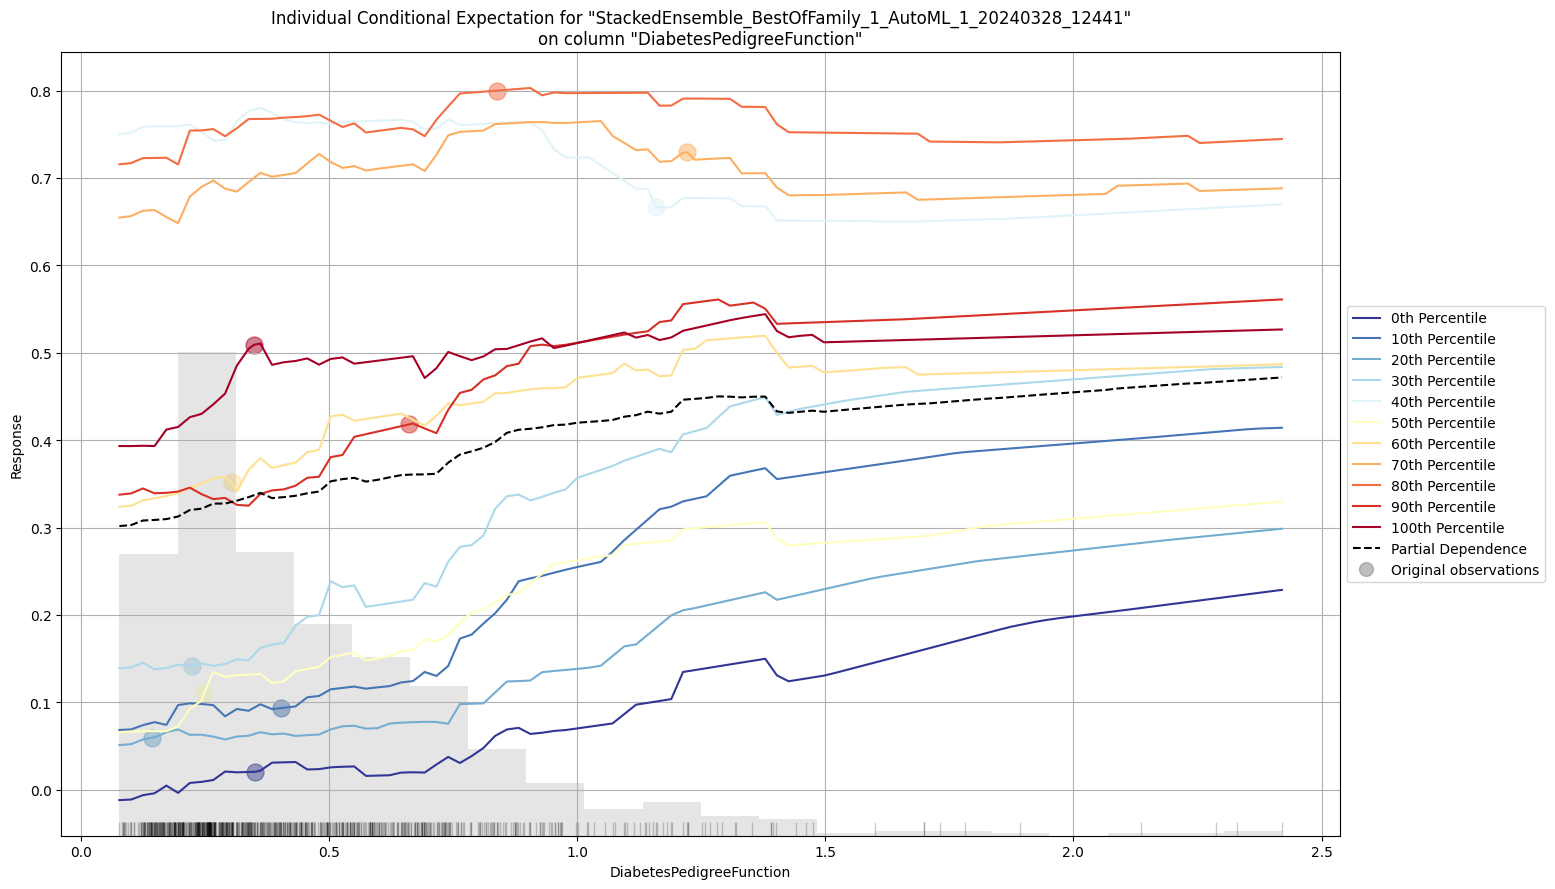

In [ ]:
auto_ml.explain(diabetic_data)

In [ ]:
!nvidia-smi

Thu Mar 28 01:26:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0              26W /  70W |    177MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
lb=auto_ml.leaderboard
lb.head()

model_id                                                    rmse       mse       mae     rmsle    mean_residual_deviance
------------------------------------------------------  --------  --------  --------  --------  ------------------------
StackedEnsemble_BestOfFamily_1_AutoML_1_20240328_12441  0.397683  0.158152  0.322789  0.279301                  0.158152
StackedEnsemble_AllModels_1_AutoML_1_20240328_12441     0.400162  0.16013   0.323191  0.28082                   0.16013
GLM_1_AutoML_1_20240328_12441                           0.400369  0.160296  0.333359  0.28183                   0.160296
XRT_1_AutoML_1_20240328_12441                           0.401972  0.161582  0.320736  0.283338                  0.161582
GBM_grid_1_AutoML_1_20240328_12441_model_1              0.402701  0.162168  0.339003  0.282884                  0.162168
DeepLearning_1_AutoML_1_20240328_12441                  0.403005  0.162413  0.320651  0.283188                  0.162413
GBM_2_AutoML_1_20240328_12441                           0.403552  0.162854  0.321129  0.283508                  0.162854
GBM_1_AutoML_1_20240328_12441                           0.407612  0.166148  0.342093  0.285945                  0.166148
DRF_1_AutoML_1_20240328_12441                           0.409139  0.167395  0.324334  0.286849                  0.167395
GBM_4_AutoML_1_20240328_12441                           0.412172  0.169886  0.330364  0.290452                  0.169886
[10 rows x 6 columns]

In [ ]:
auto_ml.leader.model_performance(test_data)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.1470578961561328
RMSE: 0.3834812852749568
MAE: 0.31156253723418736
RMSLE: 0.26674466296011456
Mean Residual Deviance: 0.1470578961561328
R^2: 0.3698693775045435
Null degrees of freedom: 158
Residual degrees of freedom: 153
Null deviance: 37.230540254151634
Residual deviance: 23.382205488825115
AIC: 160.43075554298747

In [ ]:
models=list(auto_ml.leaderboard['model_id'].as_data_frame().iloc[:,0])

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


['StackedEnsemble_BestOfFamily_1_AutoML_1_20240328_12441',
 'StackedEnsemble_AllModels_1_AutoML_1_20240328_12441',
 'GLM_1_AutoML_1_20240328_12441',
 'XRT_1_AutoML_1_20240328_12441',
 'GBM_grid_1_AutoML_1_20240328_12441_model_1',
 'DeepLearning_1_AutoML_1_20240328_12441',
 'GBM_2_AutoML_1_20240328_12441',
 'GBM_1_AutoML_1_20240328_12441',
 'DRF_1_AutoML_1_20240328_12441',
 'GBM_4_AutoML_1_20240328_12441',
 'GBM_5_AutoML_1_20240328_12441',
 'GBM_3_AutoML_1_20240328_12441',
 'XGBoost_grid_1_AutoML_1_20240328_12441_model_2',
 'XGBoost_grid_1_AutoML_1_20240328_12441_model_1',
 'XGBoost_1_AutoML_1_20240328_12441',
 'XGBoost_2_AutoML_1_20240328_12441',
 'XGBoost_3_AutoML_1_20240328_12441']

In [ ]:
models

['StackedEnsemble_BestOfFamily_1_AutoML_1_20240328_12441',
 'StackedEnsemble_AllModels_1_AutoML_1_20240328_12441',
 'GLM_1_AutoML_1_20240328_12441',
 'XRT_1_AutoML_1_20240328_12441',
 'GBM_grid_1_AutoML_1_20240328_12441_model_1',
 'DeepLearning_1_AutoML_1_20240328_12441',
 'GBM_2_AutoML_1_20240328_12441',
 'GBM_1_AutoML_1_20240328_12441',
 'DRF_1_AutoML_1_20240328_12441',
 'GBM_4_AutoML_1_20240328_12441',
 'GBM_5_AutoML_1_20240328_12441',
 'GBM_3_AutoML_1_20240328_12441',
 'XGBoost_grid_1_AutoML_1_20240328_12441_model_2',
 'XGBoost_grid_1_AutoML_1_20240328_12441_model_1',
 'XGBoost_1_AutoML_1_20240328_12441',
 'XGBoost_2_AutoML_1_20240328_12441',
 'XGBoost_3_AutoML_1_20240328_12441']